**Table of contents**<a id='toc0_'></a>

- [Importing Libraries](#toc1_)
- [Configuring Visualization Parameters](#toc2_)
- [Configuring Other Notebook Parameters](#toc3_)
- [Pre-installing Custom Functions](#toc4_)
- [Practicing in Stages](#toc5_)
  - [ANN with MNIST - Part One - Data](#toc5_1_)
    - [Loading the MNIST Dataset](#toc5_1_1_)
    - [Batch Loading with Dataloader](#toc5_1_2_)
  - [ANN with MNIST - Part Two - Creating the Network](#toc5_2_)
    - [Model Building](#toc5_2_1_)
    - [Flatten the Training Data](#toc5_2_2_)
  - [ANN with MNIST - Part Three - Training](#toc5_3_)
  - [ANN with MNIST - Part Four - Evaluation](#toc5_4_)
    - [Plotting the Loss and Accuracy Comparison Graph for the ANN Model](#toc5_4_1_)
    - [Evaluation of the ANN Model on Test Data](#toc5_4_2_)
  - [MNIST with CNN - Code Along - Part One](#toc5_5_)
  - [MNIST with CNN - Code Along - Part Two](#toc5_6_)
  - [MNIST with CNN - Code Along - Part Three](#toc5_7_)
    - [Plotting the Loss and Accuracy Comparison Graph for the CNN Model](#toc5_7_1_)
    - [Evaluation of the CNN Model on Test Data](#toc5_7_2_)
  - [Using GPUs for PyTorch](#toc5_8_)
- [Notebook Compression](#toc6_)

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


# <a id='toc1_'></a>[Importing Libraries](#toc0_)


In [1]:
# Import PyTorch before using PyTorch functions
import torch

# The module `torch.nn` contains different classes that help in building neural network models
import torch.nn as nn

# The module `torch.nn.functional` contains all the functions in the `torch.nn` library

# It is a convention to use namespace `F` to improve programming efficiency
import torch.nn.functional as F

# Check the version of PyTorch that is running
print(torch.__version__)

2.1.0.dev20230416


In [2]:
# Batch load data using the `torch.utils.data.DataLoader` module

# Randomly sample elements using the `torch.utils.data.RandomSampler` module
from torch.utils.data import DataLoader, RandomSampler

# Torchvision provides many built-in datasets in the `torchvision.datasets` module,
# including the MNIST dataset that will be used here

# Torchvision has many common image transformations in the `torchvision.transforms` module
from torchvision import datasets, transforms

# `torchvision.utils.make_grid` module provides the function to create an image grid
from torchvision.utils import make_grid

In [3]:
import numpy as np
import pandas as pd

# Evaluate results using `sklearn.metrics.confusion_matrix` module
from sklearn.metrics import confusion_matrix

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
from functools import wraps
from ipynbcompress import compress
import itertools
import math
import os
import reprlib
import sys
from termcolor import cprint
import time

# <a id='toc2_'></a>[Configuring Visualization Parameters](#toc0_)


In [6]:
%matplotlib inline

In [7]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [8]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": 0.8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# <a id='toc3_'></a>[Configuring Other Notebook Parameters](#toc0_)


In [9]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

In [10]:
# `np.set_printoptions` is used to set print options that determine how floats, arrays
# and other NumPy objects are formatted

# Here, this setting is used to widen the printed array
np.set_printoptions(formatter=dict(int=lambda x: f"{x:4}"))

# <a id='toc4_'></a>[Pre-installing Custom Functions](#toc0_)


In [11]:
sys.path.append("../")

In [12]:
from Modules import *

# <a id='toc5_'></a>[Practicing in Stages](#toc0_)

## <a id='toc5_1_'></a>[ANN with MNIST - Part One - Data](#toc0_)

### <a id='toc5_1_1_'></a>[Loading the MNIST Dataset](#toc0_)


In [13]:
# Convert MNIST images to tensors
transform = transforms.ToTensor()

train_data = datasets.MNIST(
    root="../Datasets", train=True, download=True, transform=transform
)
test_data = datasets.MNIST(
    root="../Datasets", train=False, download=True, transform=transform
)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading the MNIST training and validation/test datasets")

statements = [
    """
transform = transforms.ToTensor()

train_data = datasets.MNIST(
    root="../Datasets", train=True, download=True, transform=transform
)
test_data = datasets.MNIST(
    root="../Datasets", train=False, download=True, transform=transform
)
"""
]
tabulation.statement_generator(statements)

variables = ["transform", "train_data", "test_data"]
values = [
    str(transform),
    str(reprlib_rules.repr(train_data)),
    str(reprlib_rules.repr(test_data)),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(train_data)",
    "train_data[0]",
    "type(train_data[0])",
    "len(train_data[0])",
    "len(test_data)",
    "test_data[0]",
    "type(test_data[0])",
    "len(test_data[0])",
]
results = [
    str(len(train_data)),
    str(reprlib_rules.repr(train_data[0])),
    str(type(train_data[0])),
    str(len(train_data[0])),
    str(len(test_data)),
    str(reprlib_rules.repr(test_data[0])),
    str(type(test_data[0])),
    str(len(test_data[0])),
]
tabulation.expression_generator(expressions, results)

Loading the MNIST training and validation/test datasets

    +-----------------------------------------------------+
    | Statement                                           |
    +-----------------------------------------------------+
    | transform = transforms.ToTensor()                   |
    |                                                     |
    | train_data = datasets.MNIST(                        |
    |     root="../Datasets", train=True, download=True,  |
    |     transform=transform                             |
    | )                                                   |
    | test_data = datasets.MNIST(                         |
    |     root="../Datasets", train=False, download=True, |
    |     transform=transform                             |
    | )                                                   |
    +-----------------------------------------------------+
    +------------+---------------------------------+
    | Variable   | Value                          

In [14]:
# Each element in the training or validation/test dataset is a 2-element tuple
image, label = train_data[0]

tabulation = Form_Generator()
tabulation.heading_printer("Examining a training record")

statements = ["image, label = train_data[0]"]
tabulation.statement_generator(statements)

variables = ["image", "label"]
values = [str(reprlib_rules.repr(image)), str(label)]
tabulation.variable_generator(variables, values, 12)

expressions = ["image.shape"]
results = [str(image.shape)]
tabulation.expression_generator(expressions, results)

Examining a training record

    +------------------------------+
    | Statement                    |
    +------------------------------+
    | image, label = train_data[0] |
    +------------------------------+
    +----------+----------------------------------------------+
    | Variable | Value                                        |
    +----------+----------------------------------------------+
    | image    | tensor([[[0.0000, 0.0000, 0.0000, 0.0000,    |
    |          |             0.0000, 0.0000, 0.0000, 0.0000,  |
    |          |           0.0000, 0.0000, 0.0000, 0.0000,    |
    |          |             0.0000,...0000,                  |
    |          |           0.0000, 0.0000, 0.0000, 0.0000,    |
    |          |             0.0000, 0.0000, 0.0000, 0.0000,  |
    |          |           0.0000, 0.0000, 0.0000, 0.0000]]]) |
    | label    | 5                                            |
    +----------+----------------------------------------------+
    +-------------

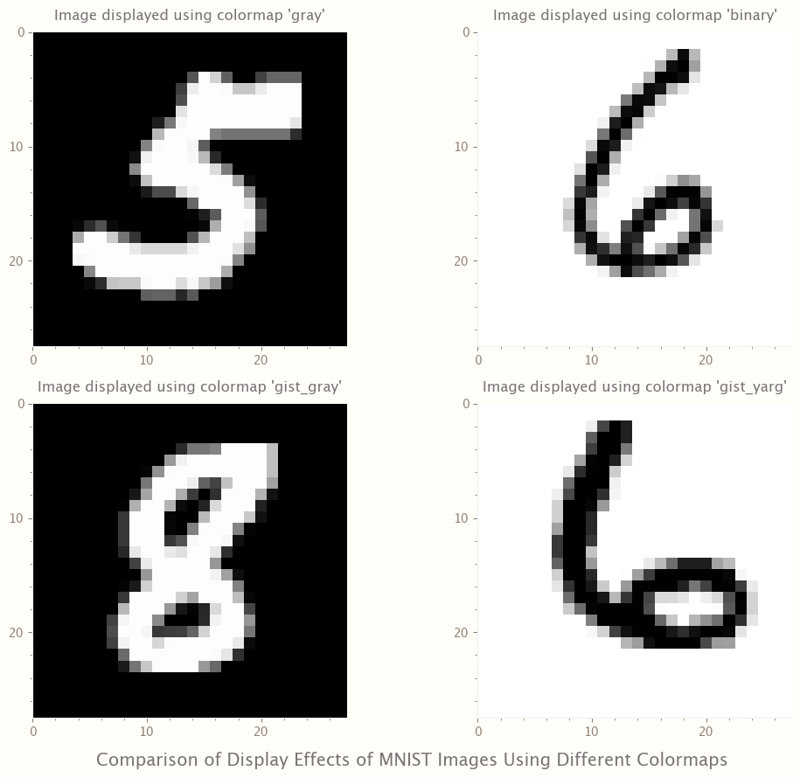

In [15]:
# The default matplotlib colormap is called 'viridis'
def image_display(image, ax, title, cmap):
    # Data can be displayed as an image using `imshow`, but only on a 2D regular raster,
    # so it needs to be reshaped into a 2D array
    ax.imshow(image.reshape((28, 28)), cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    ticks = list(range(0, 28, 10))
    ax.set(xticks=ticks, xticklabels=ticks, yticks=ticks, yticklabels=ticks)
    ax.set_xlim(left=0)
    ax.set_ylim(top=0)
    ax.minorticks_on()
    return ax


plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1])

random_selector = np.random.choice(range(len(train_data)), 4)

fig, axs = plt.subplots(nrows=2, ncols=2)

image_display(
    train_data[random_selector[0]][0],
    axs[0, 0],
    "Image displayed using colormap 'gray'",
    cmap="gray",
)

image_display(
    train_data[random_selector[1]][0],
    axs[0, 1],
    "Image displayed using colormap 'binary'",
    cmap="binary",
)

# 'gist_gray' and 'gray' belong to the Sequential2 class of colormap, and they are
# almost identical to the naked eye, showing a monotonous gradient from black to white
image_display(
    train_data[random_selector[2]][0],
    axs[1, 0],
    "Image displayed using colormap 'gist_gray'",
    cmap="gist_gray",
)

# 'gist_yarg' and 'binary' belong to the Sequential2 class of colormap, and they are
# almost identical to the naked eye, showing a monotonous gradient from white to black
image_display(
    train_data[random_selector[3]][0],
    axs[1, 1],
    "Image displayed using colormap 'gist_yarg'",
    cmap="gist_yarg",
)


fig.suptitle(
    "Comparison of Display Effects of MNIST Images Using Different Colormaps",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

### <a id='toc5_1_2_'></a>[Batch Loading with Dataloader](#toc0_)


In [16]:
# The pseudo-random number generator uses the seed as its initial seed and generates
# all sequential numbers based on this initial seed which will be used to control randomness
torch.manual_seed(101)

# Sequential or shuffled batches of data will be automatically built according to the
# `shuffle` parameter of the `DataLoader`

# In order to better train the dataset, the training dataset needs to be shuffled
# during batch loading
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

tabulation = Form_Generator()
tabulation.heading_printer("Configuration for batch loading")

statements = [
    """
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)
"""
]
tabulation.statement_generator(statements)

expressions = [
    "len(train_loader)",
    "len(train_loader.dataset)",
    "next(iter(train_loader))[0].shape",
    "next(iter(train_loader))[1].shape",
    "len(test_loader)",
    "len(test_loader.dataset)",
    "next(iter(test_loader))[0].shape",
    "next(iter(test_loader))[1].shape",
]
results = [
    str(len(train_loader)),
    str(len(train_loader.dataset)),
    str(next(iter(train_loader))[0].shape),
    str(next(iter(train_loader))[1].shape),
    str(len(test_loader)),
    str(len(test_loader.dataset)),
    str(next(iter(test_loader))[0].shape),
    str(next(iter(test_loader))[1].shape),
]
tabulation.expression_generator(expressions, results, 12)

Configuration for batch loading

    +-------------------------------------------------------+
    | Statement                                             |
    +-------------------------------------------------------+
    | torch.manual_seed(101)                                |
    |                                                       |
    | train_loader = DataLoader(train_data, batch_size=100, |
    |     shuffle=True)                                     |
    |                                                       |
    | test_loader = DataLoader(test_data, batch_size=500,   |
    |     shuffle=False)                                    |
    +-------------------------------------------------------+
    +-----------------------------------+-------------------------+
    | Expression                        | Result                  |
    +-----------------------------------+-------------------------+
    | len(train_loader)                 | 600                     |
    | len(tra

In [17]:
# This is a way to grab the first batch of images in a loop

# If the loop continues, this loop will be executed a total of 60000 / 100 = 600 times
for images, labels in train_loader:
    break

tabulation = Form_Generator()
tabulation.heading_printer("Grabbing the first batch of images")

statements = [
    """
for images, labels in train_loader:
    break
"""
]
tabulation.statement_generator(statements)

variables = ["images", "labels"]
values = [str(reprlib_rules.repr(images)), str(reprlib_rules.repr(labels))]
tabulation.variable_generator(variables, values)

expressions = ["images.shape", "labels.shape", "labels.numpy()"]
results = [
    str(images.shape),
    str(labels.shape),
    str(labels.numpy()),
]
tabulation.expression_generator(expressions, results, 3)

Grabbing the first batch of images

    +-------------------------------------+
    | Statement                           |
    +-------------------------------------+
    | for images, labels in train_loader: |
    |     break                           |
    +-------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | images   | tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0....       |
    |          |         [0., 0., 0.,  ..., 0., 0., 0.],          |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.]]]])     |
    | labels   | tensor([0, 7, 0, 9, 2, 1, 4, 4, 5, 7, 2, 4, 3,   |
    |          |    

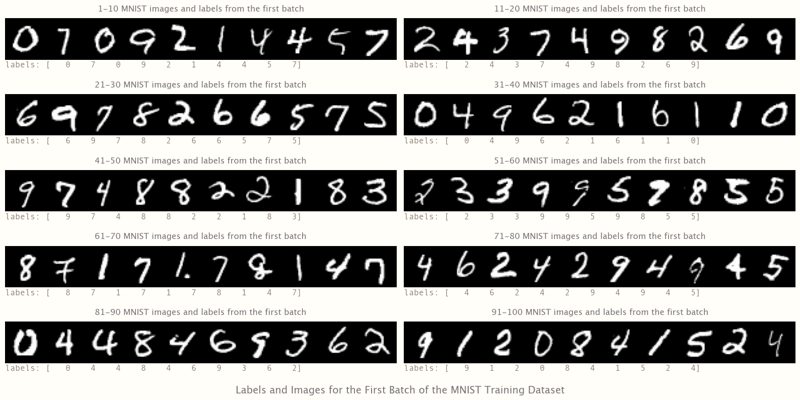

In [18]:
def grid_image_display(inputs_1, inputs_2, text, n, row_size=10, predictions=None):
    if n % row_size != 0:
        n = n // row_size * row_size

    fig, axs = plt.subplots(nrows=math.ceil(n / (2 * row_size)), ncols=2)

    if n % (2 * row_size) != 0:
        axs[n // (2 * row_size), 1].remove()

    # `np.array_split` can split an array into multiple sub-arrays
    row = iter(np.array_split(inputs_1[:n], n // row_size))

    for k in range(0, n, row_size):
        i = k // (2 * row_size)
        j = k % (2 * row_size) // row_size

        nextrow = next(row)
        title = f"{k+1}-{k+10} {text}"

        if predictions is None:
            labels = inputs_2
            images_row = nextrow
            x_label = f"labels: {str(labels[k:k+10].numpy())}"
        else:
            images, labels = next(iter(inputs_2))
            # `index_select` returns a new tensor that indexes the `input` tensor along
            # the specified dimension (`dim`) using the entries in `index`
            images_row = torch.index_select(
                input=images, dim=0, index=torch.tensor(nextrow)
            )
            x_label = (
                f"index array: {nextrow}\n"
                + f"true labels: {labels.index_select(0,torch.tensor(nextrow)).numpy()}\n"
                + f"predictions: {predictions.index_select(0,torch.tensor(nextrow)).numpy()}"
            )

        # The parameter `nrow` in the `make_grid` module defines the number of images displayed
        # in each row of the grid, and the default value is 8
        im = make_grid(images_row, nrow=row_size)

        # Before displaying the image, the array needs to be transposed from CWH to WHC,
        # where C represents the channel, W represents the width, and H represents the height
        axs[i, j].imshow(np.transpose(im.numpy(), (1, 2, 0)))
        axs[i, j].set_title(
            title,
            loc="center",
            pad=10,
        )
        axs[i, j].set_xlabel(
            x_label,
            labelpad=2,
            fontfamily="monospace",
            fontsize="large",
            loc="left",
            color=custom_params["xtick.color"],
        )
        axs[i, j].set(xticks=[], yticks=[], frame_on=False)
        axs[i, j].grid(False)
    return fig


plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 10 * 9)


fig = grid_image_display(
    images, labels, "MNIST images and labels from the first batch", 100, row_size=10
)

fig.suptitle(
    "Labels and Images for the First Batch of the MNIST Training Dataset",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

## <a id='toc5_2_'></a>[ANN with MNIST - Part Two - Creating the Network](#toc0_)

### <a id='toc5_2_1_'></a>[Model Building](#toc0_)


In [19]:
class MultilayerPerceptron(nn.Module):
    # The input size (`in_sz`) should be the product of the image length and width pixels,
    # which is 28 * 28 = 784

    # It is recommended to replace the mutable default parameter with None

    # So this definition can be rewritten as follows:
    # def __init__(self, in_sz=784, out_sz=10, layers=None):
    #     if layers is None:
    #         layers = [120, 84]
    #     super().__init__()
    #     self.fc1 = nn.Linear(in_sz, layers[0])
    #     self.fc2 = nn.Linear(layers[0], layers[1])
    #     self.fc3 = nn.Linear(layers[1], out_sz)
    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, X):
        # Apply the Rectified Linear Unit (ReLU) function element-wise via `F.relu`

        # Both ReLU and softmax are activation functions, which can limit the explosion of
        # the value calculated by the neuron to the extreme value, so as to ensure that
        # the value is within a range

        # Recent research proves that ReLU performs well in almost all cases compared to
        # other activation functions, besides, tanh is another very commonly used
        # activation function
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        # Softmax gives the class score for each class, which is basically a probability
        # distribution, which in turn tells the neural network how confident it is of
        # a certain class as the actual output, so softmax is a common method for
        # multi-class classification activation function

        # Apply a softmax followed by a logarithm via `F.log_softmax`

        # `dim` here means a dimension along which `F.log_softmax` will be computed
        return F.log_softmax(X, dim=1)


# Resets the random seed, ensuring that the initial weights and biases of the model
# are unchanged each time the specified seed is used

# Note that resetting the generator can go back to the beginning of the sequence number
# for the specified seed
torch.manual_seed(101)

model = MultilayerPerceptron()

tabulation = Form_Generator()
tabulation.heading_printer("Definition of the ANN model")

definitions = [
    """
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)
"""
]
tabulation.definition_generator(definitions)

statements = [
    """
torch.manual_seed(101)

model = MultilayerPerceptron()
"""
]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

Definition of the ANN model

    +-----------------------------------------------------------+
    | Definition                                                |
    +-----------------------------------------------------------+
    | class MultilayerPerceptron(nn.Module):                    |
    |     def __init__(self, in_sz=784, out_sz=10, layers=[120, |
    |     84]):                                                 |
    |         super().__init__()                                |
    |         self.fc1 = nn.Linear(in_sz, layers[0])            |
    |         self.fc2 = nn.Linear(layers[0], layers[1])        |
    |         self.fc3 = nn.Linear(layers[1], out_sz)           |
    |                                                           |
    |     def forward(self, X):                                 |
    |         X = F.relu(self.fc1(X))                           |
    |         X = F.relu(self.fc2(X))                           |
    |         X = self.fc3(X)                  

In [20]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()


def count_parameters(model):
    # `named_parameters` returns an iterator over the module parameters, yielding
    # the name of the parameter and the parameter itself
    names = [n for (n, p) in model.named_parameters() if p.requires_grad]
    name = "total parameters"
    names.append(name)
    max_length = max(map(len, names))
    # `:<` returns left-aligned results within available space
    formatted_names = [f"{n:<{max_length}}" for n in names]

    # `numel` returns the total number of elements in the input tensor

    # `parameters` returns an iterator over the module parameters, typically passed to
    # the optimizer
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    params.append(sum(params))
    # `:>` returns right-aligned results within available space
    formatted_params = [f"{p:>{max_length}}" for p in params]

    for n, p in zip(formatted_names[:-1], formatted_params[:-1]):
        cprint((n + p).replace(" ", "."), font_color)
    cprint("_" * max_length * 2, font_color)
    cprint(
        (formatted_names[-1] + formatted_params[-1]).replace(" ", "."),
        font_color,
        end="\n\n",
    )

    return names, params


names, params = count_parameters(model)

dataframe = DataFrame_Generator("parameter name", "number")

for n, p in zip(names, params):
    dataframe.updater(n, p)

tabulation.heading_printer("Count of the ANN model parameters")

definitions = [
    """
def count_parameters(model):
    names = [n for (n, p) in model.named_parameters() if p.requires_grad]
    name = "total parameters"
    names.append(name)
    max_length = max(map(len, names))
    formatted_names = [f"{n:<{max_length}}" for n in names]

    params = [p.numel() for p in model.parameters() if p.requires_grad]
    params.append(sum(params))
    formatted_params = [f"{p:>{max_length}}" for p in params]

    for n, p in zip(formatted_names[:-1], formatted_params[:-1]):
        cprint((n + p).replace(" ", "."), font_color)
    cprint("_" * max_length * 2, font_color)
    cprint(
        (formatted_names[-1] + formatted_params[-1]).replace(" ", "."),
        font_color,
        end="\n\n"
    )

    return names, params
"""
]
tabulation.definition_generator(definitions)

statements = ["names, params = count_parameters(model)"]
tabulation.statement_generator(statements)

variables = ["names", "params"]
values = [str(names), str(params)]
tabulation.variable_generator(variables, values, 1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

fc1.weight.................94080
fc1.bias.....................120
fc2.weight.................10080
fc2.bias......................84
fc3.weight...................840
fc3.bias......................10
________________________________
total.parameters..........105214

Count of the ANN model parameters

    +-------------------------------------------------------------+
    | Definition                                                  |
    +-------------------------------------------------------------+
    | def count_parameters(model):                                |
    |     names = [n for (n, p) in model.named_parameters() if    |
    |     p.requires_grad]                                        |
    |     name = "total parameters"                               |
    |     names.append(name)                                      |
    |     max_length = max(map(len, names))                       |
    |     formatted_names = [f"{n:<{max_length}}" for n in names] |
    |               

In [21]:
# Cross-entropy loss is also known as logarithmic loss, logistic loss or log loss, is
# a commonly used loss function in PyTorch for training classification models

# Cross-entropy loss measures the difference between predicted class probabilities and
# true class labels

# `nn.CrossEntropyLoss` has a parameter called `reduction` which specifies the reduction
# to apply to the output, the default value is 'mean'

# Logistic regression typically optimizes the log loss for all the observations on which
# it is trained, which is the same as optimizing the average cross-entropy in the sample
criterion = nn.CrossEntropyLoss()
# The Adam optimizer is an optimization technique for machine learning and deep learning,
# which belongs to the gradient descent algorithm

# The Adam optimizer is fast and very effective when dealing with large problems involving
# large amounts of data, because it requires less memory and is very efficient

# The Adam optimizer is a combination of momentum and root mean square propagation algorithms,
# which are gradient descent methods that outperform stochastic gradient descent when
# the model is complex (as in most cases of deep learning)

# The Adam optimizer is relatively easy to configure, and the default configuration parameters
# perform well on most problems
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Configuration settings specification for the ANN training process"
)

statements = [
    """
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
"""
]
tabulation.statement_generator(statements)

variables = ["criterion", "optimizer"]
values = [str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Configuration settings specification for the ANN training process

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | criterion = nn.CrossEntropyLoss()                          |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.001) |
    +------------------------------------------------------------+
    +-----------+---------------------------+
    | Variable  | Value                     |
    +-----------+---------------------------+
    | criterion | CrossEntropyLoss()        |
    | optimizer | Adam (                    |
    |           | Parameter Group 0         |
    |           |     amsgrad: False        |
    |           |     betas: (0.9, 0.999)   |
    |           |     capturable: False     |
    |           |     differentiable: False |
    |           |     eps: 1e-08            |
    |           |     for

### <a id='toc5_2_2_'></a>[Flatten the Training Data](#toc0_)


In [22]:
# Since the `shuffle` parameter of `train_loader` was set to True before, the batches of
# images and labels acquired at this time are different from the last time
dataiter = iter(train_loader)
images, labels = next(dataiter)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Grabbing the first batch of images by another method")

statements = [
    """
dataiter = iter(train_loader)
images, labels = next(dataiter)
"""
]
tabulation.statement_generator(statements)

variables = ["images", "labels"]
values = [str(reprlib_rules.repr(images)), str(reprlib_rules.repr(labels))]
tabulation.variable_generator(variables, values)

expressions = ["images.shape", "labels.shape", "labels.numpy()"]
results = [
    str(images.shape),
    str(labels.shape),
    str(labels.numpy()),
]
tabulation.expression_generator(expressions, results, 3)

Grabbing the first batch of images by another method

    +---------------------------------+
    | Statement                       |
    +---------------------------------+
    | dataiter = iter(train_loader)   |
    | images, labels = next(dataiter) |
    +---------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | images   | tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0....       |
    |          |         [0., 0., 0.,  ..., 0., 0., 0.],          |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.]]]])     |
    | labels   | tensor([8, 7, 9, 0, 2, 7, 2, 1, 4, 5, 1, 3, 1,   |
    |          |         1

In [23]:
# Multi-layer perceptrons generally take one-dimensional vectors as input, so before
# feeding a two-dimensional image into the model, it needs to be flattened first
flattened_images = images.view(100, -1)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Flattening images for multi-layer perceptron models")

statements = ["flattened_images = images.view(100, -1)"]
tabulation.statement_generator(statements)

variables = ["flattened_images"]
values = [str(reprlib_rules.repr(flattened_images))]
tabulation.variable_generator(variables, values)

expressions = [
    "flattened_images.shape",
    "images.view(100,-1)[0]",
    "images.view(100,-1)[0].shape",
]
results = [
    str(flattened_images.shape),
    str(reprlib_rules.repr(images.view(100, -1)[0])),
    str(images.view(100, -1)[0].shape),
]
tabulation.expression_generator(expressions, results, 3)

Flattening images for multi-layer perceptron models

    +-----------------------------------------+
    | Statement                               |
    +-----------------------------------------+
    | flattened_images = images.view(100, -1) |
    +-----------------------------------------+
    +------------------+------------------------------------------+
    | Variable         | Value                                    |
    +------------------+------------------------------------------+
    | flattened_images | tensor([[0., 0., 0.,  ..., 0., 0., 0.],  |
    |                  |         [0., 0., 0.,  ..., 0., 0., 0.],  |
    |                  |         [0., 0., 0.,  ..., 0., 0., 0.],  |
    |                  |    .....,                                |
    |                  |         [0., 0., 0.,  ..., 0., 0., 0.],  |
    |                  |         [0., 0., 0.,  ..., 0., 0., 0.],  |
    |                  |         [0., 0., 0.,  ..., 0., 0., 0.]]) |
    +------------------+---

## <a id='toc5_3_'></a>[ANN with MNIST - Part Three - Training](#toc0_)


In [24]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

start_time = time.time()

# Experience from previous experiments showed that training for 10 epochs on this dataset
# is more than enough
epochs = 10
# Create four empty lists as trackers for model training and model validation for each epoch
train_loss = []
valid_loss = []
train_correct = []
valid_correct = []

dataframe = DataFrame_Generator(
    "epoch",
    "training loss",
    "validation loss",
    "training correct",
    "validation correct",
    "training accuracy (%)",
    "validation accuracy (%)",
)

for i in range(epochs):
    trn_loss = 0
    val_loss = 0
    trn_corr = 0
    val_corr = 0

    # The `enumerate` function adds a counter to an iterable object and returns it as
    # an enumeration object, which can then be used directly in a loop or converted to
    # a list of tuples using the `list` function

    # For this case, the enumeration object is a counter and a 2-element tuple of images
    # and their labels

    # It should be noted that the `enumerate` function can set the index value from which
    # the counter starts, the default is 0

    # This is the phase of model training
    for b, (X_train, y_train) in enumerate(train_loader, 1):
        # According to the construction of this multi-layer perceptron model, the output size
        # of the model is 10, which means that the output layer has 10 neurons

        # For each image, the result should be a list of 10 elements, where each element
        # represents the probability distribution of the image for each of the 10 neurons
        y_pred = model(X_train.view(100, -1))
        batch_loss = criterion(y_pred, y_train)
        trn_loss += batch_loss

        # `torch.max` returns the maximum value of all elements in the input tensor,
        # where `dim` represents the dimension to reduce

        # The output of `torch.max` is a tuple of two tensors, the maximum value and
        # the index of the maximum value

        # In this case, the result should be the label of the neuron with the highest
        # probability distribution in the 10-element list

        # Both `y_pred` and `y_pred.data` are tensors, the difference is that the former
        # is a tensor that requires gradients, while the latter is not
        predicted = torch.max(y_pred.data, dim=1)[1]
        # This equality comparison returns true or false, essentially zero or one
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        # Print updated loss and accuracy after every 200 batches
        if b % 200 == 0:
            cprint(
                f"epoch: {i+1:2}-{b//200} | batches: {b:3} [{100*b:5}/{len(train_data)}] | "
                f"loss: {trn_loss.item()/b:10.8f} | accuracy: {trn_corr.item()/b:6.3f}%",
                font_color,
            )
            if b == len(train_loader) and i != epochs - 1:
                cprint(
                    "+".join(["-" * 12, "-" * 28, "-" * 18, "-" * 18]),
                    font_color,
                )
            elif b == len(train_loader):
                cprint(
                    "_" * 79,
                    font_color,
                )

    train_loss.append(trn_loss.item() / len(train_loader))
    train_correct.append(trn_corr.item())

    # This is the phase of model validation
    with torch.no_grad():
        for X_test, y_test in test_loader:
            y_val = model(X_test.view(500, -1))

            batch_loss = criterion(y_val, y_test)
            val_loss += batch_loss

            predicted = torch.max(y_val.data, 1)[1]
            val_corr += (predicted == y_test).sum()

    valid_loss.append(val_loss.item() / len(test_loader))
    valid_correct.append(val_corr.item())

    dataframe.updater(
        i + 1,
        train_loss[i],
        valid_loss[i],
        train_correct[i],
        valid_correct[i],
        np.divide(train_correct[i], len(train_data)) * 100,
        np.divide(valid_correct[i], len(test_data)) * 100,
    )

cprint(
    f"Duration: {time.time() - start_time:.1f} seconds".rjust(79),
    font_color,
    end="\n\n",
)

tabulation.heading_printer(
    "Model training and validation of the ANN model for a specific number of epochs"
)

statements = [
    """
start_time = time.time()

epochs = 10
train_loss = []
valid_loss = []
train_correct = []
valid_correct = []

for i in range(epochs):
    trn_loss = 0
    val_loss = 0
    trn_corr = 0
    val_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader, 1):
        y_pred = model(X_train.view(100, -1))
        batch_loss = criterion(y_pred, y_train)
        trn_loss += batch_loss

        predicted = torch.max(y_pred.data, dim=1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        if b % 200 == 0:
            cprint(
                f"epoch: {i+1:2}-{b//200} | batches: {b:3} [{100*b:5}/{len(train_data)}] | "
                f"loss: {trn_loss.item()/b:10.8f} | accuracy: {trn_corr.item()/b:6.3f}%",
                font_color,
            )
            if b == len(train_loader) and i != epochs - 1:
                cprint(
                    "+".join(["-" * 12, "-" * 28, "-" * 18, "-" * 18]),
                    font_color,
                )
            elif b == len(train_loader):
                cprint(
                    "_" * 79,
                    font_color,
                )

    train_loss.append(trn_loss.item() / len(train_loader))
    train_correct.append(trn_corr.item())

    with torch.no_grad():
        for X_test, y_test in test_loader:
            y_val = model(X_test.view(500, -1))

            batch_loss = criterion(y_val, y_test)
            val_loss += batch_loss

            predicted = torch.max(y_val.data, 1)[1]
            val_corr += (predicted == y_test).sum()

    valid_loss.append(val_loss.item() / len(test_loader))
    valid_correct.append(val_corr.item())

cprint(
    f"Duration: {time.time() - start_time:.1f} seconds".rjust(79),
    font_color,
    end="\n\n",
)
"""
]
tabulation.statement_generator(statements)

variables = ["epochs", "train_loss", "valid_loss",
             "train_correct", "valid_correct"]
values = [
    str(epochs),
    str(train_loss),
    str(valid_loss),
    str(train_correct),
    str(valid_correct),
]
tabulation.variable_generator(variables, values, 1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

epoch:  1-1 | batches: 200 [20000/60000] | loss: 0.65445580 | accuracy: 82.655%
epoch:  1-2 | batches: 400 [40000/60000] | loss: 0.46547596 | accuracy: 87.248%
epoch:  1-3 | batches: 600 [60000/60000] | loss: 0.38584302 | accuracy: 89.317%
------------+----------------------------+------------------+------------------
epoch:  2-1 | batches: 200 [20000/60000] | loss: 0.18122530 | accuracy: 94.625%
epoch:  2-2 | batches: 400 [40000/60000] | loss: 0.17106855 | accuracy: 95.000%
epoch:  2-3 | batches: 600 [60000/60000] | loss: 0.16112156 | accuracy: 95.247%
------------+----------------------------+------------------+------------------
epoch:  3-1 | batches: 200 [20000/60000] | loss: 0.11492867 | accuracy: 96.545%
epoch:  3-2 | batches: 400 [40000/60000] | loss: 0.11319660 | accuracy: 96.530%
epoch:  3-3 | batches: 600 [60000/60000] | loss: 0.11078578 | accuracy: 96.593%
------------+----------------------------+------------------+------------------
epoch:  4-1 | batches: 200 [20000/60000]

## <a id='toc5_4_'></a>[ANN with MNIST - Part Four - Evaluation](#toc0_)

### <a id='toc5_4_1_'></a>[Plotting the Loss and Accuracy Comparison Graph for the ANN Model](#toc0_)


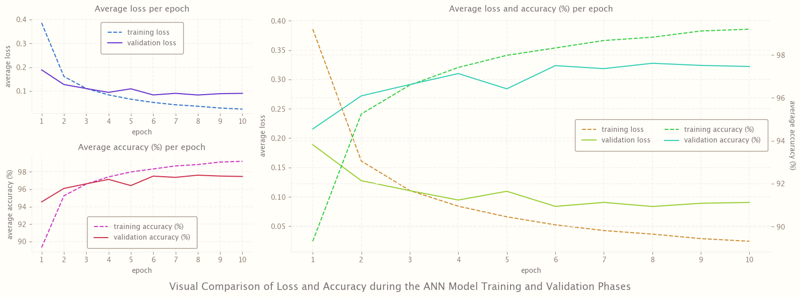

In [25]:
def type_checker_plt(typeid):
    evaluation_type = ["loss", "accuracy (%)"]
    if typeid not in range(len(evaluation_type)):
        exception = Exception(
            "The index was not found in the list of supported evaluation types."
        )
        raise exception


def twin_switcher_plt(ax, twin_switch):
    global legend_handles, legend_labels

    if twin_switch == "ON":
        ax.set_title("", loc="center", pad=10)
        ax.get_legend().remove()
        ax = ax.twinx()
    elif twin_switch == "END":
        del legend_handles, legend_labels
    return ax


def loss_accuracy_plt(
    data,
    label,
    ax,
    title=None,
    typeid=0,
    position="left",
    twin_axes=False,
    twin_switch="OFF",
):
    global colors, legend_handles, legend_labels

    type_checker_plt(typeid)

    evaluation_type = ["loss", "accuracy (%)"]
    legend_label = f"{label} {evaluation_type[typeid]}"

    (legend_handle,) = ax.plot(
        data,
        label=legend_label,
        c=next(colors),
        linestyle="-" if label == "validation" else "--",
    )

    x_ticks = list(range(len(data)))
    ax.set(
        xticks=x_ticks,
        xticklabels=[x + 1 for x in x_ticks],
    )
    ax.set_xlabel(xlabel="epoch", labelpad=5, rotation=0, ha="center")
    ax.set_ylabel(
        ylabel=f"average {evaluation_type[typeid]}",
        labelpad=5 if position == "left" else 15,
        rotation=90 if position == "left" else -90,
        ha="center",
    )
    ax.yaxis.set_label_position(position),
    ax.yaxis.set_ticks_position(position)
    if ax.get_title() == "":
        if title is None:
            if twin_axes == False:
                title = f"Average {evaluation_type[typeid]} per epoch"
            else:
                title = "Average loss and accuracy (%) per epoch"
        ax.set_title(title, loc="center", pad=10)
    legend_positions = ["upper center", "lower center", "center right"]
    if twin_axes == False:
        ax.legend(loc=legend_positions[typeid], borderpad=1, ncol=1)
    else:
        try:
            legend_handles, legend_labels
        except NameError:
            legend_handles = []
            legend_labels = []
        legend_handles.append(legend_handle)
        legend_labels.append(legend_label)
        ax.legend(
            handles=legend_handles,
            labels=legend_labels,
            loc=legend_positions[-1],
            borderpad=1,
            ncol=2,
        )
    ax = twin_switcher_plt(ax, twin_switch)
    return ax


colors = iter(calm_color_generator(8))

plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 3 * 2)

fig, axs = plt.subplots(nrows=2, ncols=3)

gridspec = axs[0, 0].get_gridspec()
for ax in axs[:, 1]:
    ax.remove()
for ax in axs[:, -1]:
    ax.remove()
ax_big = fig.add_subplot(gridspec[:, 1:])

axs[0, 0] = loss_accuracy_plt(train_loss, "training", axs[0, 0])
# The model cannot be expected to perform as well on the validation/test dataset as it does
# on the training dataset, since it will not adjust its weights and biases based on the
# validation/test dataset

# If the model is trained for more and more epochs, the model starts to overfit

# So it is important to look for epochs around this intersection, it helps to know
# how many epochs should really be trained, and then beyond that, the model will definitely
# overfit the training dataset as the validation results start to flatten out
axs[0, 0] = loss_accuracy_plt(valid_loss, "validation", axs[0, 0])

axs[1, 0] = loss_accuracy_plt(
    [t / 600 for t in train_correct],
    "training",
    axs[1, 0],
    typeid=1,
)
axs[1, 0] = loss_accuracy_plt(
    [t / 100 for t in valid_correct],
    "validation",
    axs[1, 0],
    typeid=1,
)

ax_big = loss_accuracy_plt(train_loss, "training", ax_big, twin_axes=True)
ax_big = loss_accuracy_plt(
    valid_loss, "validation", ax_big, twin_axes=True, twin_switch="ON"
)
ax_big = loss_accuracy_plt(
    [t / 600 for t in train_correct],
    "training",
    ax_big,
    typeid=1,
    position="right",
    twin_axes=True,
)
ax_big = loss_accuracy_plt(
    [t / 100 for t in valid_correct],
    "validation",
    ax_big,
    typeid=1,
    position="right",
    twin_axes=True,
    twin_switch="END",
)


fig.suptitle(
    "Visual Comparison of Loss and Accuracy during the ANN Model Training and Validation Phases",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

### <a id='toc5_4_2_'></a>[Evaluation of the ANN Model on Test Data](#toc0_)


In [26]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

# In order to evaluate this trained network model, a new, unseen dataset of images needs
# to be run, if not available, imagine extracting the test dataset as a new dataset at once
# instead of batch fetching and testing separately
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

# This process does not load any gradients, it just passes the data to the model without
# updating any weights and biases
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        # Process the image data as a flattened view
        y_tst = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_tst, 1)[1]
        correct += (predicted == y_test).sum()
cprint(
    # This is the total accuracy on the test dataset
    f"Test accuracy: {correct.item()}/{len(test_data)} = "
    f"{correct.item()*100/(len(test_data)):6.3f}%",
    font_color,
    end="\n\n",
)

tabulation.heading_printer("Accuracy evaluation of the ANN model on test data")

statements = [
    """
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_tst = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_tst, 1)[1]
        correct += (predicted == y_test).sum()
cprint(
    f"Test accuracy: {correct.item()}/{len(test_data)} = "
    f"{correct.item()*100/(len(test_data)):6.3f}%",
    font_color,
    end="\n\n"
)
"""
]
tabulation.statement_generator(statements)

variables = ["X_test", "y_test", "y_tst", "predicted", "correct"]
values = [
    str(reprlib_rules.repr(X_test)),
    str(y_test),
    str(reprlib_rules.repr(y_tst)),
    str(predicted),
    str(correct),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(X_test)",
    "len(y_test)",
    "len(y_tst)",
    "len(predicted)",
    "correct.item()",
    "len(test_load_all)",
    "len(test_load_all.dataset)",
    "next(iter(test_load_all))[0].shape",
]
results = [
    str(len(X_test)),
    str(len(y_test)),
    str(len(y_tst)),
    str(len(predicted)),
    str(correct.item()),
    str(len(test_load_all)),
    str(len(test_load_all.dataset)),
    str(next(iter(test_load_all))[0].shape),
]
tabulation.expression_generator(expressions, results, 12)

Test accuracy: 9746/10000 = 97.460%

Accuracy evaluation of the ANN model on test data

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | test_load_all = DataLoader(test_data, batch_size=10000,    |
    |     shuffle=False)                                         |
    |                                                            |
    | with torch.no_grad():                                      |
    |     correct = 0                                            |
    |     for X_test, y_test in test_load_all:                   |
    |         y_tst = model(X_test.view(len(X_test), -1))        |
    |         predicted = torch.max(y_tst, 1)[1]                 |
    |         correct += (predicted == y_test).sum()             |
    | cprint(                                                    |
    |     f"Test accuracy: {correct.item(

In [27]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

title = "Confusion Matrix"
cprint(title.center(53), font_color, attrs=["bold"])
cprint("[[" + "=" * 49 + "]]", font_color)
# `torch.stack` concatenates a sequence of tensors along a new dimension, this function
# has a parameter `dim` with a default value of 0, indicating the dimension to insert
stacked_tensor = torch.stack((y_test, predicted))
# `torch.unique` returns the unique elements of the input tensor, which by default are sorted
# in ascending order before being returned as output
labels = torch.unique(stacked_tensor)
cprint(labels.reshape(1, 10).numpy(), font_color)
cprint("[[" + "---|-" * 9 + "---|" + "]]", font_color)
# `confusion_matrix` calculates a confusion matrix to evaluate the accuracy of the
# classification, the function has a parameter `labels`, the default value is None
# indicating the list of labels used to index the matrix

# This means the list can be used to reorder or select a subset of labels, if None is given,
# labels that occur at least once in the ground truth or predicted target will be used in
# sorted order

# In this case, the ground truth and predicted targets do not need to be reshaped, but
# if their dimensions are greater than 1, they need to be reshaped into 1D arrays
cprint(confusion_matrix(y_test.view(-1), predicted.view(-1)), font_color)
cprint("[[" + "=" * 49 + "]]", font_color, end="\n\n")

tabulation.heading_printer(
    "Confusion matrix print of the ANN model test results")

statements = [
    """
title = "Confusion Matrix"
cprint(title.center(53), font_color, attrs=["bold"])
cprint("[[" + "=" * 49 + "]]", font_color)
stacked_tensor = torch.stack((y_test, predicted))
labels = torch.unique(stacked_tensor)
cprint(labels.reshape(1, 10).numpy(), font_color)
cprint("[[" + "---|-" * 9 + "---|" + "]]", font_color)
cprint(confusion_matrix(y_test.view(-1), predicted.view(-1)), font_color)
cprint("[[" + "=" * 49 + "]]", font_color, end="\n\n")
"""
]
tabulation.statement_generator(statements)

variables = ["title", "stacked_tensor", "labels"]
values = [title, str(reprlib_rules.repr(stacked_tensor)), str(labels)]
tabulation.variable_generator(variables, values)

expressions = [
    "y_test.shape",
    "y_test.view(-1).shape",
    "predicted.shape",
    "predicted.view(-1).shape",
    "stacked_tensor.shape",
    "labels.shape",
]
results = [
    str(y_test.shape),
    str(y_test.view(-1).shape),
    str(predicted.shape),
    str(predicted.view(-1).shape),
    str(stacked_tensor.shape),
    str(labels.shape),
]
tabulation.expression_generator(expressions, results)

                   Confusion Matrix                  
[[=================================================]]
[[   0    1    2    3    4    5    6    7    8    9]]
[[---|----|----|----|----|----|----|----|----|----|]]
[[ 972    0    2    1    0    0    3    0    2    0]
 [   0 1121    5    2    0    0    1    1    5    0]
 [   2    0 1019    2    1    0    2    3    2    1]
 [   1    0    8  991    0    0    1    3    6    0]
 [   0    0    5    1  951    0    8    3    4   10]
 [   1    1    0   23    1  844   10    0   11    1]
 [   2    4    1    1    2    1  946    0    1    0]
 [   1    8   11    5    0    0    0  994    6    3]
 [   4    0    4    5    0    2    3    2  953    1]
 [   7    2    0   15    7    6    1    2   14  955]]
[[=================================================]]

Confusion matrix print of the ANN model test results

    +--------------------------------------------------------+
    | Statement                                              |
    +-------------

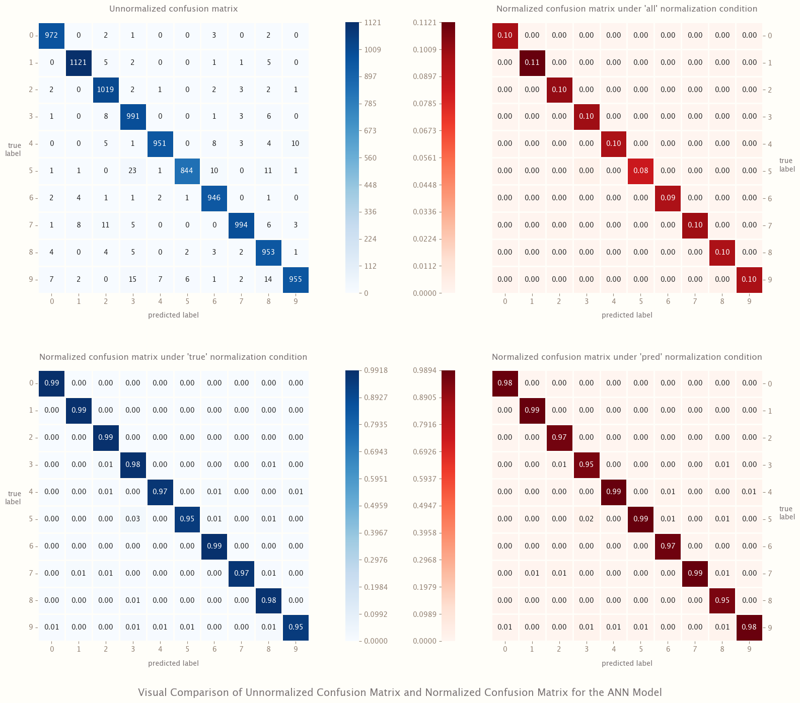

In [28]:
def plot_confusion_matrix(
    ax,
    y_true,
    y_pred,
    labels=None,
    title=None,
    normalize=None,
    cbar_kws=None,
    cmap="binary",
    cbar_location="right",
):
    if not labels:
        labels = torch.unique(torch.stack((y_true, y_pred)))

    if not title:
        if not normalize:
            title = "Unnormalized confusion matrix"
        else:
            title = f"Normalized confusion matrix under '{normalize}' normalization condition"

    # `confusion_matrix` has a parameter `normalize`, if it is None the confusion matrix 
    # will not be normalized; otherwise the confusion matrix will be normalized on 
    # the true (rows) condition, the predicted (columns) condition, or on all overall

    # The returns of `confusion_matrix` is a two-dimensional array, the entry in row i and
    # column j represents the number of samples whose true label is class i and predicted label
    # is class j
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    fmt = ".2f" if normalize else "d"
    y_position = "left" if cbar_location == "right" else "right"

    cbar_kws_0 = {
        "ticks": np.linspace(cm.min(), cm.max(), 11, endpoint=True),
        "shrink": 0.8,
        "location": cbar_location,
        "spacing": "uniform",
        "pad": 0.1,
    }
    cbar_kws_0 if not cbar_kws else cbar_kws_0.update(cbar_kws)

    ax = sns.heatmap(
        cm,
        cmap=cmap,
        annot=True,
        fmt=fmt,
        annot_kws={"size": 10},
        linewidths=2,
        linecolor=custom_params["axes.facecolor"],
        cbar_kws=cbar_kws_0,
        square=True,
        ax=ax,
    )

    ax.set_title(title, loc="center", pad=15)
    ax.set_xlabel("predicted label", labelpad=10)
    ax.set_ylabel("true\nlabel", labelpad=10, rotation="horizontal", ha=cbar_location)
    ax.yaxis.set_label_position(y_position)
    ax.yaxis.set_ticks_position(y_position)
    ax.set_yticklabels(labels.numpy(), rotation=0)

    plt.box(False)
    plt.grid(False)


plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 5 * 8)

fig, axs = plt.subplots(nrows=2, ncols=2)

plot_confusion_matrix(axs[0, 0], y_test, predicted, cmap="Blues")

plot_confusion_matrix(
    axs[0, 1], y_test, predicted, cmap="Reds", normalize="all", cbar_location="left"
)

plot_confusion_matrix(axs[1, 0], y_test, predicted, cmap="Blues", normalize="true")

plot_confusion_matrix(
    axs[1, 1], y_test, predicted, cmap="Reds", normalize="pred", cbar_location="left"
)

fig.suptitle(
    "Visual Comparison of Unnormalized Confusion Matrix and Normalized Confusion Matrix "
    "for the ANN Model",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

In [29]:
# If no `dtype` parameter is set, `np.array` will create an array of the default data type,
# which is 'float64'

# Because this array will record all miss-predicted indexes from the predicted labels,
# the type of the array should be an integer type
misses = np.array([], dtype="int64")
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses, i)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Predicted label indexes for the image data where the ANN model predicted incorrectly"
)

statements = [
    """
misses = np.array([], dtype="int64")
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses, i)
"""
]
tabulation.statement_generator(statements)

variables = ["misses"]
values = [str(reprlib_rules.repr(misses))]
tabulation.variable_generator(variables, values)

expressions = ["len(misses)", "misses.dtype"]
results = [str(len(misses)), str(misses.dtype)]
tabulation.expression_generator(expressions, results)

Predicted label indexes for the image data where the ANN model predicted incorrectly

    +------------------------------------------+
    | Statement                                |
    +------------------------------------------+
    | misses = np.array([], dtype="int64")     |
    | for i in range(len(predicted.view(-1))): |
    |     if predicted[i] != y_test[i]:        |
    |         misses = np.append(misses, i)    |
    +------------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | misses   | array([   8,  115,  149,  151,  241,  247,  274, |
    |          |          321,  340,  381,  445,                  |
    |          |         447,  448,  478,  479,  495,  582,  619, |
    |          |          ..., 9019, 9024, 9071, 9422, 9587,      |
    |          |         9634,                

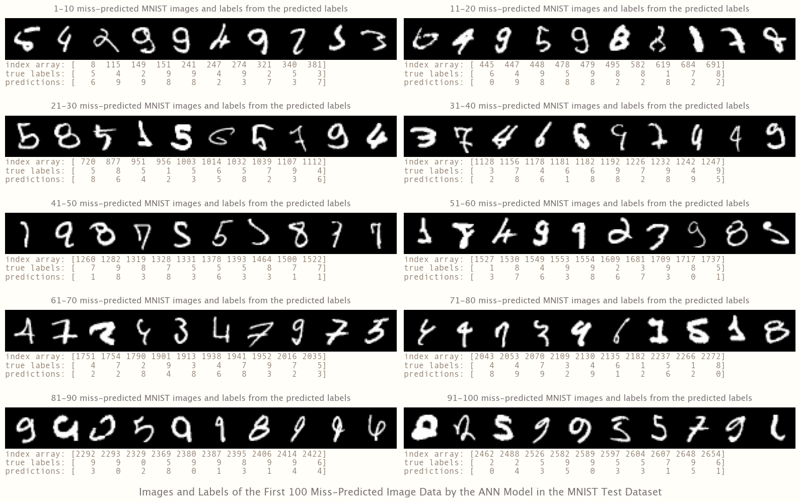

In [30]:
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 7 * 8)

fig = grid_image_display(
    misses,
    test_load_all,
    "miss-predicted MNIST images and labels from the predicted labels",
    100,
    row_size=10,
    predictions=predicted,
)

fig.suptitle(
    "Images and Labels of the First 100 Miss-Predicted Image Data by the ANN Model "
    "in the MNIST Test Dataset",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

## <a id='toc5_5_'></a>[MNIST with CNN - Code Along - Part One](#toc0_)


In [31]:
# When processing images, it is recommended to start with relatively small batches and then
# work with larger batch sizes, even batch sizes of 4 are not uncommon
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

tabulation = Form_Generator()
tabulation.heading_printer("New configuration for batch loading")

statements = [
    """
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

test_loader = DataLoader(test_data, batch_size=10, shuffle=False)
"""
]
tabulation.statement_generator(statements)

expressions = [
    "len(train_loader)",
    "train_loader.batch_size",
    "len(train_loader.dataset)",
    "len(test_loader)",
    "test_loader.batch_size",
    "len(test_loader.dataset)",
]
results = [
    str(len(train_loader)),
    str(train_loader.batch_size),
    str(len(train_loader.dataset)),
    str(len(test_loader)),
    str(test_loader.batch_size),
    str(len(test_loader.dataset)),
]
tabulation.expression_generator(expressions, results)

New configuration for batch loading

    +------------------------------------------------------+
    | Statement                                            |
    +------------------------------------------------------+
    | train_loader = DataLoader(train_data, batch_size=10, |
    |     shuffle=True)                                    |
    |                                                      |
    | test_loader = DataLoader(test_data, batch_size=10,   |
    |     shuffle=False)                                   |
    +------------------------------------------------------+
    +---------------------------+--------+
    | Expression                | Result |
    +---------------------------+--------+
    | len(train_loader)         | 6000   |
    | train_loader.batch_size   | 10     |
    | len(train_loader.dataset) | 60000  |
    | len(test_loader)          | 1000   |
    | test_loader.batch_size    | 10     |
    | len(test_loader.dataset)  | 10000  |
    +----------------------

In [32]:
# `nn.Conv2d` applies a 2D convolution to an input signal composed of multiple input planes

# `in_channels` indicates the number of channels in the input image, while `out_channels`
# indicates the number of channels produced by convolution

# `kernel_size` represents the size of the convolution kernel, and `stride` represents
# the step size of the convolution (the default value is 1)

# `padding` determines the size of the padding added to all four sides of the input,
# and its default value is 0, although it is not redefined here, it determines whether
# to preserve the border of the input image during convolution

# The 6 filters of the first convolutional layer and the 16 filters of the second
# convolutional layer are all chosen arbitrarily, and this choice is usually obtained
# through experimental experience
conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)
# According to the CNN structure designed here, there is a pooling layer between the
# two convolutional layers, but this pooling will not change the number of filters
# between the two convolutional layers

# So, the number of output filters of the first convolutional layer is the same as
# the number of input filters of the second convolutional layer
conv2 = nn.Conv2d(6, 16, 3, 1)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Convolutional layer configuration for a simple convolutional neural network"
)

statements = [
    """
conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)
conv2 = nn.Conv2d(6, 16, 3, 1)
"""
]
tabulation.statement_generator(statements)

variables = ["conv1", "conv2"]
values = [str(conv1), str(conv2)]
tabulation.variable_generator(variables, values)

expressions = ["conv1._parameters", "conv2._parameters"]
results = [
    str(reprlib_rules.repr(conv1._parameters)),
    str(reprlib_rules.repr(conv2._parameters)),
]

Convolutional layer configuration for a simple convolutional neural network

    +--------------------------------------------------+
    | Statement                                        |
    +--------------------------------------------------+
    | conv1 = nn.Conv2d(in_channels=1, out_channels=6, |
    |     kernel_size=3, stride=1)                     |
    | conv2 = nn.Conv2d(6, 16, 3, 1)                   |
    +--------------------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | conv1    | Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))  |
    | conv2    | Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1)) |
    +----------+--------------------------------------------------+


In [33]:
# The loop stride of `train_data` is different from that of `train_loader`, the former
# is a photo, and the latter is a batch
for X_train, y_train in train_data:
    break

# This is just an image sample, so it's a 3D tensor, but for a batch, even a batch of size 10,
# it should be a 4D tensor, so it is important to reshape this image tensor

# This step is not required for batches from `train_loader` or `test_loader`
x = X_train.view(1, 1, 28, 28)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Extraction of the test sample for building convolutional neural networks"
)

statements = [
    """
for X_train, y_train in train_data:
    break

x = X_train.view(1, 1, 28, 28)
"""
]
tabulation.statement_generator(statements)

variables = ["X_train", "y_train", "x"]
values = [str(reprlib_rules.repr(X_train)), str(y_train), str(reprlib_rules.repr(x))]
tabulation.variable_generator(variables, values)

expressions = ["X_train.shape", "x.shape"]
results = [str(X_train.shape), str(x.shape)]
tabulation.expression_generator(expressions, results)

Extraction of the test sample for building convolutional neural networks

    +-------------------------------------+
    | Statement                           |
    +-------------------------------------+
    | for X_train, y_train in train_data: |
    |     break                           |
    |                                     |
    | x = X_train.view(1, 1, 28, 28)      |
    +-------------------------------------+
    +----------+------------------------------------------------+
    | Variable | Value                                          |
    +----------+------------------------------------------------+
    | X_train  | tensor([[[0.0000, 0.0000, 0.0000, 0.0000,      |
    |          |         0.0000, 0.0000, 0.0000, 0.0000,        |
    |          |           0.0000, 0.0000, 0.0000, 0.0000,      |
    |          |         0.0000,...0000,                        |
    |          |           0.0000, 0.0000, 0.0000, 0.0000,      |
    |          |         0.0000, 0.0000, 0.000

In [34]:
# As with ANNs, for CNNs, an activation function needs to be performed on each output neuron
# in each layer

# As mentioned earlier, because the default setting of padding is 0, it means that during
# the convolution process, no padding is added to any of the four sides to preserve the border

# In fact, for MNIST images, the border pixels do not contain any important information,
# in this case there is no need to preserve the border
x = F.relu(conv1(x))

tabulation = Form_Generator()
tabulation.heading_printer("Implementation of the first convolutional layer")

statements = [
    """
x = F.relu(conv1(x))
"""
]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(reprlib_rules.repr(x))]
tabulation.variable_generator(variables, values)

expressions = ["x.shape"]
results = [str(x.shape)]
tabulation.expression_generator(expressions, results)

Implementation of the first convolutional layer

    +----------------------+
    | Statement            |
    +----------------------+
    | x = F.relu(conv1(x)) |
    +----------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | x        | tensor([[[[0.0395, 0.0395, 0.0395,  ..., 0.0395, |
    |          |         0.0395, 0.0395],                         |
    |          |           [0.0395, 0.0395, 0.0395,  ..., 0.0395, |
    |          |         0.0395, ....0989, 0.0989, 0.0989],       |
    |          |           [0.0989, 0.0989, 0.0989,  ..., 0.0989, |
    |          |         0.0989, 0.0989]]]],                      |
    |          |        grad_fn=⟨ReluBackward0⟩)                  |
    +----------+--------------------------------------------------+
    +------------+----------------------------+
    | Expr

In [35]:
# `F.max_pool2d` applies 2D max-pooling to an input signal composed of multiple input planes

# Obviously, `input` represents the input tensor, `kernel_size` represents the size of
# the pooling area, and `stride` represents the step size of the pooling operation

# The parameters `kernel_size` and `stride` can both be integer type or tuple type,
# for the former, it can be treated as a tuple of two identical integers, so both types
# can represent height and width dimensions
x = F.max_pool2d(input=x, kernel_size=2, stride=2)

tabulation = Form_Generator()
tabulation.heading_printer("Implementation of the first max pooling layer")

statements = [
    """
x = F.max_pool2d(input=x, kernel_size=2, stride=2)
"""
]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(reprlib_rules.repr(x))]
tabulation.variable_generator(variables, values)

expressions = ["x.shape"]
results = [str(x.shape)]
tabulation.expression_generator(expressions, results)

Implementation of the first max pooling layer

    +----------------------------------------------------+
    | Statement                                          |
    +----------------------------------------------------+
    | x = F.max_pool2d(input=x, kernel_size=2, stride=2) |
    +----------------------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | x        | tensor([[[[0.0395, 0.0395, 0.0395,  ..., 0.0395, |
    |          |         0.0395, 0.0395],                         |
    |          |           [0.0395, 0.0395, 0.0395,  ..., 0.0395, |
    |          |         0.0395, ....0989],                       |
    |          |           [0.0989, 0.0989, 0.0989,  ..., 0.0989, |
    |          |         0.0989, 0.0989]]]],                      |
    |          |        grad_fn=⟨MaxPool2DWith

In [36]:
x = F.relu(conv2(x))
# `F.max_pool2d` has a parameter `ceil_mode` set to False by default, when set to True
# it ensures that each element in the input tensor is covered by a sliding window

# In simple language, `ceil_mode` determines the direction of rounding when the `input` tensor
# is not divisible by `kernel_size`

# When `ceil_mode` keeps the default value of False, the output is rounded down, and vice versa
x = F.max_pool2d(x, 2, 2)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Implementation of the second convolutional layer and max pooling layer"
)

statements = [
    """
x = F.relu(conv2(x))
x = F.max_pool2d(x, 2, 2)
"""
]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(reprlib_rules.repr(x))]
tabulation.variable_generator(variables, values)

expressions = ["x.shape"]
results = [str(x.shape)]
tabulation.expression_generator(expressions, results)

Implementation of the second convolutional layer and max pooling layer

    +---------------------------+
    | Statement                 |
    +---------------------------+
    | x = F.relu(conv2(x))      |
    | x = F.max_pool2d(x, 2, 2) |
    +---------------------------+
    +----------+-------------------------------------------------+
    | Variable | Value                                           |
    +----------+-------------------------------------------------+
    | x        | tensor([[[[0.0000e+00, 0.0000e+00, 7.5831e-02,  |
    |          |         9.3590e-02, 1.7593e-01],                |
    |          |           [0.0000e+00, 1.1770e-01, 6.5332e-03,  |
    |          |         1.40...,                                |
    |          |           [0.0000e+00, 8.4961e-02, 1.2062e-01,  |
    |          |         1.3249e-01, 0.0000e+00]]]],             |
    |          |        grad_fn=⟨MaxPool2DWithIndicesBackward0⟩) |
    +----------+--------------------------------------

In [37]:
# Here, it is recommended to set the number of the first dimension, that is, batch size,
# to -1 to ensure that batches of any size can be used at any time without any modification
x = x.view(-1, 5 * 5 * 16)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Image flattening for passing to fully connected layers")

statements = [
    """
x = x.view(-1, 5 * 5 * 16)
"""
]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(reprlib_rules.repr(x))]
tabulation.variable_generator(variables, values)

expressions = ["x.shape"]
results = [str(x.shape)]
tabulation.expression_generator(expressions, results)

Image flattening for passing to fully connected layers

    +----------------------------+
    | Statement                  |
    +----------------------------+
    | x = x.view(-1, 5 * 5 * 16) |
    +----------------------------+
    +----------+----------------------------------------------+
    | Variable | Value                                        |
    +----------+----------------------------------------------+
    | x        | tensor([[0.0000e+00, 0.0000e+00, 7.5831e-02, |
    |          |         9.3590e-02, 1.7593e-01, 0.0000e+00,  |
    |          |          1.1770e-01, 6.5332e-03,             |
    |          |         1.4052e-0...9973e-01, 6.4100e-02,    |
    |          |         0.0000e+00,                          |
    |          |          8.4961e-02, 1.2062e-01, 1.3249e-01, |
    |          |         0.0000e+00]],                        |
    |          |        grad_fn=⟨ViewBackward0⟩)              |
    +----------+----------------------------------------------+
 

## <a id='toc5_6_'></a>[MNIST with CNN - Code Along - Part Two](#toc0_)


In [38]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        # The number of neurons in the fully connected layer can be an arbitrary choice,
        # just keep the number down or at least keep the same number of input and output
        # neurons in the same layer
        self.fc2 = nn.Linear(120, 84)
        # What really matters here is that the output must be 10, since there are 10 classes
        # that receive classification results
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        # In order to simplify the construction of the network, the pooling layer can
        # be regarded more as a subsampling function or pooling function, which works
        # in the same way as the activation function, without the need to build a
        # separate pooling layer
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5 * 5 * 16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)


torch.manual_seed(42)

model = ConvolutionalNetwork()


tabulation = Form_Generator()
tabulation.heading_printer("Definition of the CNN model")

definitions = [
    """
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5 * 5 * 16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)
"""
]
tabulation.definition_generator(definitions)

statements = [
    """
torch.manual_seed(42)

model = ConvolutionalNetwork()
"""
]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

Definition of the CNN model

    +-----------------------------------------------+
    | Definition                                    |
    +-----------------------------------------------+
    | class ConvolutionalNetwork(nn.Module):        |
    |     def __init__(self):                       |
    |         super().__init__()                    |
    |         self.conv1 = nn.Conv2d(1, 6, 3, 1)    |
    |         self.conv2 = nn.Conv2d(6, 16, 3, 1)   |
    |         self.fc1 = nn.Linear(5 * 5 * 16, 120) |
    |         self.fc2 = nn.Linear(120, 84)         |
    |         self.fc3 = nn.Linear(84, 10)          |
    |                                               |
    |     def forward(self, X):                     |
    |         X = F.relu(self.conv1(X))             |
    |         X = F.max_pool2d(X, 2, 2)             |
    |         X = F.relu(self.conv2(X))             |
    |         X = F.max_pool2d(X, 2, 2)             |
    |         X = X.view(-1, 5 * 5 * 16)            |

In [39]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

names, params = count_parameters(model)

dataframe = DataFrame_Generator("parameter name", "number")

for n, p in zip(names, params):
    dataframe.updater(n, p)

tabulation.heading_printer("Count of the CNN model parameters")

statements = ["names, params = count_parameters(model)"]
tabulation.statement_generator(statements)

variables = ["names", "params"]
values = [str(names), str(params)]
tabulation.variable_generator(variables, values, 1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

conv1.weight..................54
conv1.bias.....................6
conv2.weight.................864
conv2.bias....................16
fc1.weight.................48000
fc1.bias.....................120
fc2.weight.................10080
fc2.bias......................84
fc3.weight...................840
fc3.bias......................10
________________________________
total.parameters...........60074

Count of the CNN model parameters

    +-----------------------------------------+
    | Statement                               |
    +-----------------------------------------+
    | names, params = count_parameters(model) |
    +-----------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | names    | ['conv1.weight', 'conv1.bias', 'conv2.weight',   |
    |          |  'conv2.bias', 'fc1.weight', 'fc1.bias'

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Configuration settings specification for the CNN training process"
)

statements = [
    """
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
"""
]
tabulation.statement_generator(statements)

variables = ["criterion", "optimizer"]
values = [str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Configuration settings specification for the CNN training process

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | criterion = nn.CrossEntropyLoss()                          |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.001) |
    +------------------------------------------------------------+
    +-----------+---------------------------+
    | Variable  | Value                     |
    +-----------+---------------------------+
    | criterion | CrossEntropyLoss()        |
    | optimizer | Adam (                    |
    |           | Parameter Group 0         |
    |           |     amsgrad: False        |
    |           |     betas: (0.9, 0.999)   |
    |           |     capturable: False     |
    |           |     differentiable: False |
    |           |     eps: 1e-08            |
    |           |     for

In [41]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

start_time = time.time()

# Previous experimental experience suggested setting the number of epochs to 5, but
# even after 3 epochs, the results went well
epochs = 5
train_loss = []
valid_loss = []
train_correct = []
valid_correct = []

dataframe = DataFrame_Generator(
    "epoch",
    "training loss",
    "validation loss",
    "training correct",
    "validation correct",
    "training accuracy (%)",
    "validation accuracy (%)",
)

for i in range(epochs):
    trn_loss = 0
    val_loss = 0
    trn_corr = 0
    val_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader, 1):
        # Unlike the process of the ANN model, there is no need to flatten the image data
        # before model training and model verification/testing, because the first layer of
        # the CNN model, the first convolutional layer, requires two-dimensional image data

        # In fact, the image flattening step will be done inside the model, just before
        # passing to the first fully connected layer of the model
        y_pred = model(X_train)
        batch_loss = criterion(y_pred, y_train)
        trn_loss += batch_loss

        predicted = torch.max(y_pred.data, dim=1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        if b % 600 == 0:
            cprint(
                f"epoch: {i+1:1}-{b//600:02} | batches: {b:4} [{10*b:5}/{len(train_data)}] | "
                f"loss: {trn_loss.item()/b:10.8f} | accuracy: {trn_corr.item()/b*10:6.3f}%",
                font_color,
            )
            if b == len(train_loader) and i != epochs - 1:
                cprint(
                    "+".join(["-" * 12, "-" * 29, "-" * 18, "-" * 18]),
                    font_color,
                )
            elif b == len(train_loader):
                cprint(
                    "_" * 80,
                    font_color,
                )

    train_loss.append(trn_loss.item() / len(train_loader))
    train_correct.append(trn_corr.item())

    with torch.no_grad():
        for X_test, y_test in test_loader:
            y_val = model(X_test)

            batch_loss = criterion(y_val, y_test)
            val_loss += batch_loss

            predicted = torch.max(y_val.data, 1)[1]
            val_corr += (predicted == y_test).sum()

    valid_loss.append(val_loss.item() / len(test_loader))
    valid_correct.append(val_corr.item())

    dataframe.updater(
        i + 1,
        train_loss[i],
        valid_loss[i],
        train_correct[i],
        valid_correct[i],
        np.divide(train_correct[i], len(train_data)) * 100,
        np.divide(valid_correct[i], len(test_data)) * 100,
    )

cprint(
    f"Duration: {time.time() - start_time:.1f} seconds".rjust(80),
    font_color,
    end="\n\n",
)

tabulation.heading_printer(
    "Model training and validation of the CNN model for a specific number of epochs"
)

statements = [
    """
start_time = time.time()

epochs = 5
train_loss = []
valid_loss = []
train_correct = []
valid_correct = []

for i in range(epochs):
    trn_loss = 0
    val_loss = 0
    trn_corr = 0
    val_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader, 1):
        y_pred = model(X_train)
        batch_loss = criterion(y_pred, y_train)
        trn_loss += batch_loss

        predicted = torch.max(y_pred.data, dim=1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        if b % 600 == 0:
            cprint(
                f"epoch: {i+1:1}-{b//600:02} | batches: {b:4} [{10*b:5}/{len(train_data)}] | "
                f"loss: {trn_loss.item()/b:10.8f} | accuracy: {trn_corr.item()/b*10:6.3f}%",
                font_color,
            )
            if b == len(train_loader) and i != epochs - 1:
                cprint(
                    "+".join(["-" * 12, "-" * 29, "-" * 18, "-" * 18]),
                    font_color,
                )
            elif b == len(train_loader):
                cprint(
                    "_" * 80,
                    font_color,
                )

    train_loss.append(trn_loss.item() / len(train_loader))
    train_correct.append(trn_corr.item())

    with torch.no_grad():
        for X_test, y_test in test_loader:
            y_val = model(X_test)

            batch_loss = criterion(y_val, y_test)
            val_loss += batch_loss

            predicted = torch.max(y_val.data, 1)[1]
            val_corr += (predicted == y_test).sum()

    valid_loss.append(val_loss.item() / len(test_loader))
    valid_correct.append(val_corr.item())

cprint(
    f"Duration: {time.time() - start_time:.1f} seconds".rjust(80),
    font_color,
    end="\n\n",
)
"""
]
tabulation.statement_generator(statements)

variables = ["epochs", "train_loss", "valid_loss",
             "train_correct", "valid_correct"]
values = [
    str(epochs),
    str(train_loss),
    str(valid_loss),
    str(train_correct),
    str(valid_correct),
]
tabulation.variable_generator(variables, values, 1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

epoch: 1-01 | batches:  600 [ 6000/60000] | loss: 0.67503637 | accuracy: 78.483%
epoch: 1-02 | batches: 1200 [12000/60000] | loss: 0.44832723 | accuracy: 85.825%
epoch: 1-03 | batches: 1800 [18000/60000] | loss: 0.35932726 | accuracy: 88.667%
epoch: 1-04 | batches: 2400 [24000/60000] | loss: 0.30339821 | accuracy: 90.479%
epoch: 1-05 | batches: 3000 [30000/60000] | loss: 0.26765629 | accuracy: 91.617%
epoch: 1-06 | batches: 3600 [36000/60000] | loss: 0.24004345 | accuracy: 92.475%
epoch: 1-07 | batches: 4200 [42000/60000] | loss: 0.21977479 | accuracy: 93.102%
epoch: 1-08 | batches: 4800 [48000/60000] | loss: 0.20490570 | accuracy: 93.590%
epoch: 1-09 | batches: 5400 [54000/60000] | loss: 0.19211525 | accuracy: 93.993%
epoch: 1-10 | batches: 6000 [60000/60000] | loss: 0.18188094 | accuracy: 94.310%
------------+-----------------------------+------------------+------------------
epoch: 2-01 | batches:  600 [ 6000/60000] | loss: 0.07234994 | accuracy: 97.800%
epoch: 2-02 | batches: 1200 

## <a id='toc5_7_'></a>[MNIST with CNN - Code Along - Part Three](#toc0_)

### <a id='toc5_7_1_'></a>[Plotting the Loss and Accuracy Comparison Graph for the CNN Model](#toc0_)


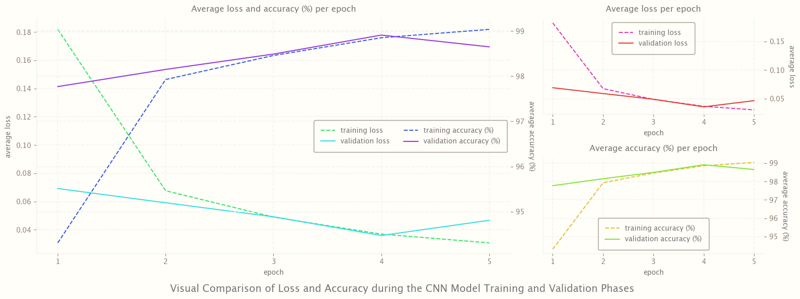

In [42]:
colors = iter(calm_color_generator(8))

plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 3 * 2)

fig, axs = plt.subplots(nrows=2, ncols=3)

gridspec = axs[0, 0].get_gridspec()
for ax in axs[:, 0]:
    ax.remove()
for ax in axs[:, 1]:
    ax.remove()
ax_big = fig.add_subplot(gridspec[:, :2])

axs[0, 2] = loss_accuracy_plt(
    train_loss,
    "training",
    axs[0, 2],
    position="right",
)
axs[0, 2] = loss_accuracy_plt(
    valid_loss,
    "validation",
    axs[0, 2],
    position="right",
)

axs[1, 2] = loss_accuracy_plt(
    [t / 600 for t in train_correct],
    "training",
    axs[1, 2],
    typeid=1,
    position="right",
)
axs[1, 2] = loss_accuracy_plt(
    [t / 100 for t in valid_correct],
    "validation",
    axs[1, 2],
    typeid=1,
    position="right",
)

ax_big = loss_accuracy_plt(train_loss, "training", ax_big, twin_axes=True)
ax_big = loss_accuracy_plt(
    valid_loss, "validation", ax_big, twin_axes=True, twin_switch="ON"
)
ax_big = loss_accuracy_plt(
    [t / 600 for t in train_correct],
    "training",
    ax_big,
    typeid=1,
    position="right",
    twin_axes=True,
)
ax_big = loss_accuracy_plt(
    [t / 100 for t in valid_correct],
    "validation",
    ax_big,
    typeid=1,
    position="right",
    twin_axes=True,
    twin_switch="END",
)

fig.suptitle(
    "Visual Comparison of Loss and Accuracy during the CNN Model Training and Validation Phases",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

### <a id='toc5_7_2_'></a>[Evaluation of the CNN Model on Test Data](#toc0_)


In [43]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_tst = model(X_test)
        predicted = torch.max(y_tst, 1)[1]
        correct += (predicted == y_test).sum()
cprint(
    f"Test accuracy: {correct.item()}/{len(test_data)} = "
    f"{correct.item()*100/(len(test_data)):6.3f}%",
    font_color,
    end="\n\n",
)

tabulation.heading_printer("Accuracy evaluation of the CNN model on test data")

statements = [
    """
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_tst = model(X_test)
        predicted = torch.max(y_tst, 1)[1]
        correct += (predicted == y_test).sum()
cprint(
    f"Test accuracy: {correct.item()}/{len(test_data)} = "
    f"{correct.item()*100/(len(test_data)):6.3f}%",
    font_color,
    end="\n\n"
)
"""
]
tabulation.statement_generator(statements)

variables = ["X_test", "y_test", "y_tst", "predicted", "correct"]
values = [
    str(reprlib_rules.repr(X_test)),
    str(y_test),
    str(reprlib_rules.repr(y_tst)),
    str(predicted),
    str(correct),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(X_test)",
    "len(y_test)",
    "len(y_tst)",
    "len(predicted)",
    "correct.item()",
    "len(test_load_all)",
    "len(test_load_all.dataset)",
    "next(iter(test_load_all))[0].shape",
]
results = [
    str(len(X_test)),
    str(len(y_test)),
    str(len(y_tst)),
    str(len(predicted)),
    str(correct.item()),
    str(len(test_load_all)),
    str(len(test_load_all.dataset)),
    str(next(iter(test_load_all))[0].shape),
]
tabulation.expression_generator(expressions, results, 12)

Test accuracy: 9865/10000 = 98.650%

Accuracy evaluation of the CNN model on test data

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | test_load_all = DataLoader(test_data, batch_size=10000,    |
    |     shuffle=False)                                         |
    |                                                            |
    | with torch.no_grad():                                      |
    |     correct = 0                                            |
    |     for X_test, y_test in test_load_all:                   |
    |         y_tst = model(X_test)                              |
    |         predicted = torch.max(y_tst, 1)[1]                 |
    |         correct += (predicted == y_test).sum()             |
    | cprint(                                                    |
    |     f"Test accuracy: {correct.item(

In [44]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

title = "Confusion Matrix"
cprint(title.center(53), font_color, attrs=["bold"])
cprint("[[" + "=" * 49 + "]]", font_color)
stacked_tensor = torch.stack((y_test, predicted))
labels = torch.unique(stacked_tensor)
cprint(labels.reshape(1, 10).numpy(), font_color)
cprint("[[" + "---|-" * 9 + "---|" + "]]", font_color)
cprint(confusion_matrix(y_test.view(-1), predicted.view(-1)), font_color)
cprint("[[" + "=" * 49 + "]]", font_color, end="\n\n")

tabulation.heading_printer(
    "Confusion matrix print of the CNN model test results")

statements = [
    """
title = "Confusion Matrix"
cprint(title.center(53), font_color, attrs=["bold"])
cprint("[[" + "=" * 49 + "]]", font_color)
stacked_tensor = torch.stack((y_test, predicted))
labels = torch.unique(stacked_tensor)
cprint(labels.reshape(1, 10).numpy(), font_color)
cprint("[[" + "---|-" * 9 + "---|" + "]]", font_color)
cprint(confusion_matrix(y_test.view(-1), predicted.view(-1)), font_color)
cprint("[[" + "=" * 49 + "]]", font_color, end="\n\n")
"""
]
tabulation.statement_generator(statements)

variables = ["title", "stacked_tensor", "labels"]
values = [title, str(reprlib_rules.repr(stacked_tensor)), str(labels)]
tabulation.variable_generator(variables, values)

expressions = [
    "y_test.shape",
    "y_test.view(-1).shape",
    "predicted.shape",
    "predicted.view(-1).shape",
    "stacked_tensor.shape",
    "labels.shape",
]
results = [
    str(y_test.shape),
    str(y_test.view(-1).shape),
    str(predicted.shape),
    str(predicted.view(-1).shape),
    str(stacked_tensor.shape),
    str(labels.shape),
]
tabulation.expression_generator(expressions, results)

                   Confusion Matrix                  
[[=================================================]]
[[   0    1    2    3    4    5    6    7    8    9]]
[[---|----|----|----|----|----|----|----|----|----|]]
[[ 974    0    1    0    0    0    3    1    1    0]
 [   5 1124    1    3    0    0    2    0    0    0]
 [   0    1 1018    5    1    0    0    5    2    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    0    0  970    0    4    0    1    7]
 [   1    0    0   22    0  864    4    0    0    1]
 [   4    2    1    0    1    3  945    0    2    0]
 [   0    5    5    1    1    0    0 1011    2    3]
 [   2    0    1    2    0    1    0    1  965    2]
 [   0    0    0    5    6    4    0    1    6  987]]
[[=================================================]]

Confusion matrix print of the CNN model test results

    +--------------------------------------------------------+
    | Statement                                              |
    +-------------

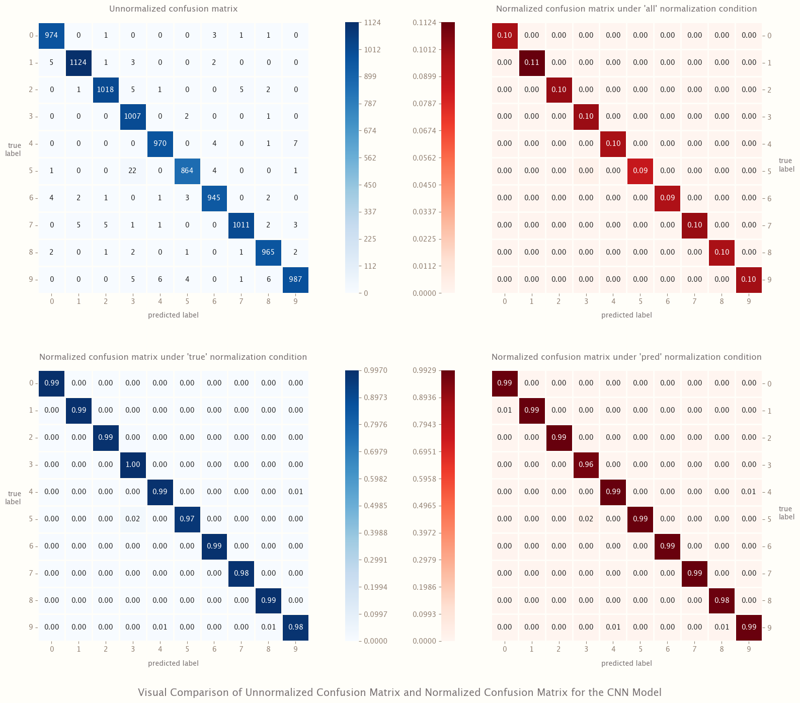

In [45]:
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 5 * 8)

fig, axs = plt.subplots(nrows=2, ncols=2)

plot_confusion_matrix(axs[0, 0], y_test, predicted, cmap="Blues")

plot_confusion_matrix(
    axs[0, 1], y_test, predicted, cmap="Reds", normalize="all", cbar_location="left"
)

plot_confusion_matrix(axs[1, 0], y_test, predicted,
                      cmap="Blues", normalize="true")

plot_confusion_matrix(
    axs[1, 1], y_test, predicted, cmap="Reds", normalize="pred", cbar_location="left"
)

fig.suptitle(
    "Visual Comparison of Unnormalized Confusion Matrix and Normalized Confusion Matrix "
    "for the CNN Model",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

In [46]:
misses = np.array([], dtype="int64")
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses, i)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Predicted label indexes for the image data where the CNN model predicted incorrectly"
)

statements = [
    """
misses = np.array([], dtype="int64")
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses, i)
"""
]
tabulation.statement_generator(statements)

variables = ["misses"]
values = [str(reprlib_rules.repr(misses))]
tabulation.variable_generator(variables, values)

expressions = ["len(misses)", "misses.dtype"]
results = [str(len(misses)), str(misses.dtype)]
tabulation.expression_generator(expressions, results)

Predicted label indexes for the image data where the CNN model predicted incorrectly

    +------------------------------------------+
    | Statement                                |
    +------------------------------------------+
    | misses = np.array([], dtype="int64")     |
    | for i in range(len(predicted.view(-1))): |
    |     if predicted[i] != y_test[i]:        |
    |         misses = np.append(misses, i)    |
    +------------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | misses   | array([ 235,  247,  320,  321,  340,  412,  445, |
    |          |          497,  582,  583,  629,                  |
    |          |         659,  674,  684,  813,  947, 1003, 1014, |
    |          |         1..., 7856, 7870, 7899, 7900,            |
    |          |        7928, 8094, 8160, 8325

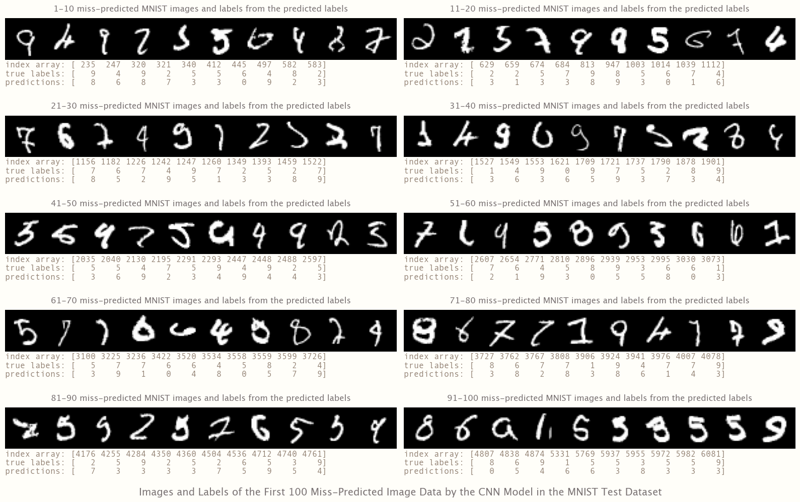

In [47]:
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 7 * 8)

fig = grid_image_display(
    misses,
    test_load_all,
    "miss-predicted MNIST images and labels from the predicted labels",
    100,
    row_size=10,
    predictions=predicted,
)

fig.suptitle(
    "Images and Labels of the First 100 Miss-Predicted Image Data by the CNN Model "
    "in the MNIST Test Dataset",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

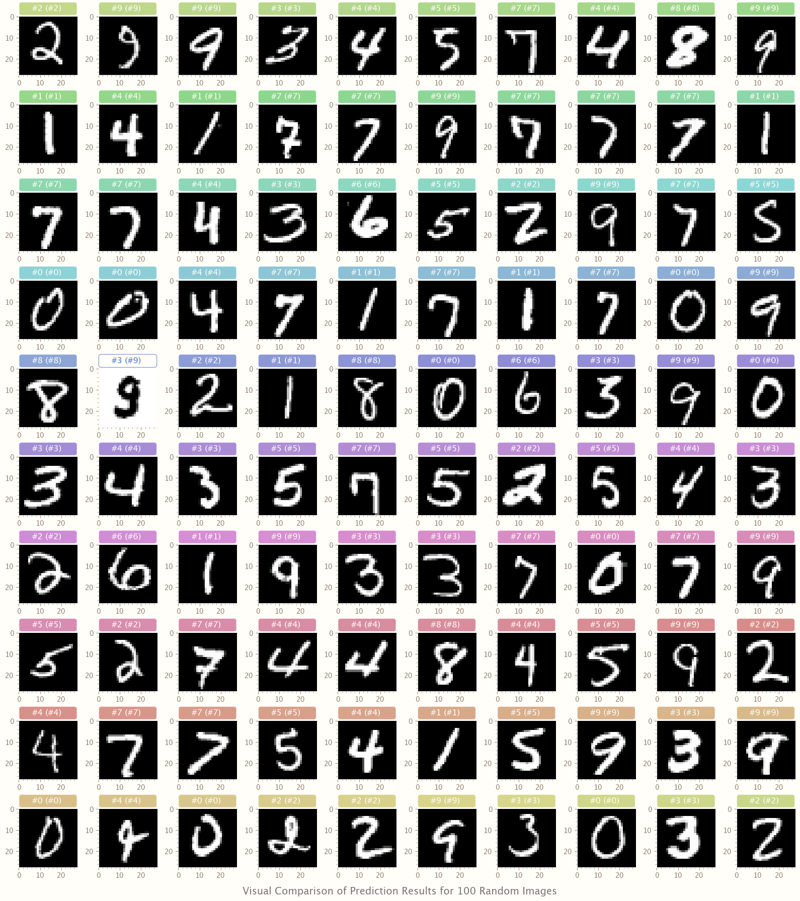

In [48]:
def prediction_checker(predicted_label, true_label):
    global colors
    if predicted_label == true_label:
        cmap = "gray"
        color = plt.rcParams["axes.facecolor"]
        bgcolor = next(colors)
    else:
        cmap = "binary"
        color = next(colors)
        bgcolor = plt.rcParams["axes.facecolor"]
    text = f"#{predicted_label} (#{true_label})"
    return cmap, text, color, bgcolor


bbox_props = dict(boxstyle="round", fc=plt.rcParams["axes.facecolor"], alpha=0.67)

num_samples = 100
colors = iter(calm_color_generator(num_samples))

# `RandomSampler` has a parameter called `replacement`, the default value is False,
# as long as this parameter is not changed, it means that the random sampling comes from
# the shuffled dataset

# Another important parameter of `RandomSampler` is `num_samples`, which represents
# the number of samples to draw
random_sampler = RandomSampler(test_data, num_samples=num_samples)
random_dataloader = DataLoader(
    test_data, batch_size=len(test_data), sampler=random_sampler
)
# As a reminder, the shape of `images` here is a 4D tensor, i.e. [x, 1, 28, 28], and
# the shape of `labels` is a 1D tensor, i.e. [x], where x is equal to the number of
# random samples from each batch, i.e. `num_samples`
images, labels = next(iter(random_dataloader))

with torch.no_grad():
    # Here, the `model` function predicts a batch of images (4D tensor) at once, however,
    # if it wants to predict a single image (3D tensor) by this function, it needs to
    # reshape the image into a 4D tensor whose shape should be [1, 1, 28, 28]

    # `torch.argmax` returns the index of the largest value of a tensor along a dimension,
    # which is the second value returned by `torch.max`

    # Same as the parameter `dim` in `torch.max`, the parameter `dim` in `torch.argmax`
    # indicates the dimension to be reduced, and the default value is None, indicating
    # the index of the returned maximum value after flattening the input
    predicted_labels = torch.argmax(model(images), dim=1)

plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] * 2)

fig, axs = plt.subplots(nrows=10, ncols=10)

for i, j in itertools.product(range(10), range(10)):
    cmap, text, color, bgcolor = prediction_checker(
        predicted_labels[i * 10 + j], labels[i * 10 + j]
    )
    # For each image in a random sample batch, its shape is a 3D tensor equal to [1, 28, 28],
    # but in order to display it, it needs to be reshaped into a 2D tensor like [28, 28],
    # this process will be done in the self-made `image_display` function
    axs[i, j] = image_display(
        images[i * 10 + j][0],
        axs[i, j],
        text,
        cmap=cmap,
    )
    bbox_props["ec"] = color
    bbox_props["fc"] = bgcolor
    axs[i, j].set_title(
        axs[i, j].get_title().center(16),
        bbox=bbox_props,
        pad=7.5,
        color=color,
        fontsize="large",
        fontfamily="sans-serif",
        fontweight="extra bold",
    )

fig.suptitle(
    "Visual Comparison of Prediction Results for 100 Random Images",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

## <a id='toc5_8_'></a>[Using GPUs for PyTorch](#toc0_)


In [49]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

# PyTorch uses the new Metal Performance Shaders (MPS) backend to provide GPU training
# acceleration for Mac computers with Apple silicon or AMD GPUs

# MPS is a binary-compatible client-server runtime implementation of the CUDA API
# which consists of several components

# Since the MPS backend is still in beta, this backend provides a different interface
# and functionality than the CUDA backend

# `torch.backends.mps.is_available` returns a boolean indicating whether MPS is currently
# available
cprint(f"MPS is currently available: {torch.backends.mps.is_available()}", font_color)

# `torch.backends.mps.is_built` returns whether PyTorch was built with MPS support,
# this only indicates whether this PyTorch binary is run on a machine with available
# MPS drivers and devices, does not necessarily mean whether MPS is available
cprint(
    f"PyTorch was built with MPS support: {torch.backends.mps.is_built()}", font_color
)

# `torch.backends.mps.is_macos13_or_newer` returns a boolean indicating whether MPS
# is running on MacOS 13 or newer
cprint(
    f"MPS is running on MacOS 13 or newer: {torch.backends.mps.is_macos13_or_newer()}",
    font_color,
    end="\n\n",
)

tabulation.heading_printer("Check of GPU availability in the current environment")

statements = [
    """
cprint(f"MPS is currently available: {torch.backends.mps.is_available()}", font_color)

cprint(
    f"PyTorch was built with MPS support: {torch.backends.mps.is_built()}", font_color
)

cprint(
    f"MPS is running on MacOS 13 or newer: {torch.backends.mps.is_macos13_or_newer()}",
    font_color,
    end="\n\n",
)
"""
]
tabulation.statement_generator(statements)

MPS is currently available: True
PyTorch was built with MPS support: True
MPS is running on MacOS 13 or newer: True

Check of GPU availability in the current environment

    +-------------------------------------------------------+
    | Statement                                             |
    +-------------------------------------------------------+
    | cprint(f"MPS is currently available:                  |
    |     {torch.backends.mps.is_available()}", font_color) |
    |                                                       |
    | cprint(                                               |
    |     f"PyTorch was built with MPS support:             |
    |     {torch.backends.mps.is_built()}", font_color      |
    | )                                                     |
    |                                                       |
    | cprint(                                               |
    |     f"MPS is running on MacOS 13 or newer:            |
    |     {torch.backen

In [50]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

# The `torch.mps` package enables the interface for accessing the MPS backend in Python

# `torch.mps.current_allocated_memory` returns the GPU memory currently occupied by
# the tensor in bytes

# The return at this point should be zero, because no tasks have been currently assigned to
# the MPS backend
cprint(
    f"Current GPU memory occupied by the tensor: {torch.mps.current_allocated_memory()} bytes",
    font_color,
)

# `torch.mps.driver_allocated_memory` returns the total amount of GPU memory allocated by
# the Metal driver for the process in bytes, which includes cache allocations from
# the MPSAllocator pool as well as allocations from the MPS/MPSGraph framework
cprint(
    f"Total amount of GPU memory allocated by the Metal driver for the process: "
    f"{torch.mps.driver_allocated_memory()} bytes",
    font_color,
    end="\n\n",
)

tabulation.heading_printer("Check of current GPU memory occupation and allocation")

statements = [
    """
cprint(
    f"Current GPU memory occupied by the tensor: {torch.mps.current_allocated_memory()} bytes",
    font_color,
)

cprint(
    f"Total amount of GPU memory allocated by the Metal driver for the process: "
    f"{torch.mps.driver_allocated_memory()} bytes",
    font_color,
    end="\n\n",
)
"""
]
tabulation.statement_generator(statements)

Current GPU memory occupied by the tensor: 0 bytes
Total amount of GPU memory allocated by the Metal driver for the process: 393216 bytes

Check of current GPU memory occupation and allocation

    +---------------------------------------------------------+
    | Statement                                               |
    +---------------------------------------------------------+
    | cprint(                                                 |
    |     f"Current GPU memory occupied by the tensor:        |
    |     {torch.mps.current_allocated_memory()} bytes",      |
    |     font_color,                                         |
    | )                                                       |
    |                                                         |
    | cprint(                                                 |
    |     f"Total amount of GPU memory allocated by the Metal |
    |     driver for the process: "                           |
    |     f"{torch.mps.driver_allocate

In [51]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

# During the usage of PyTorch, the default device is initially CPU, but it is possible to
# set the default tensor device to another device to avoid changing tensor device time by time
images, labels = next(dataiter)

# `torch.to` returns a tensor with the specified device and (optionally) dtype
images_mps, labels_mps = images.to("mps"), labels.to("mps")

cprint(
    f"Current GPU memory occupied by the tensor: {torch.mps.current_allocated_memory()} bytes",
    font_color,
)

cprint(
    f"Total amount of GPU memory allocated by the Metal driver for the process: "
    f"{torch.mps.driver_allocated_memory()} bytes",
    font_color,
    end="\n\n",
)

tabulation.heading_printer(
    "The first change: converting CPU tensor to MPS tensor")

statements = [
    """
images, labels = next(dataiter)

images_mps, labels_mps = images.to("mps"), labels.to("mps")

cprint(
    f"Current GPU memory occupied by the tensor: {torch.mps.current_allocated_memory()} bytes",
    font_color,
)

cprint(
    f"Total amount of GPU memory allocated by the Metal driver for the process: "
    f"{torch.mps.driver_allocated_memory()} bytes",
    font_color,
    end="\n\n",
)
"""
]
tabulation.statement_generator(statements)

variables = ["images", "labels", "images_mps", "labels_mps"]
values = [
    str(reprlib_rules.repr(images)),
    str(reprlib_rules.repr(labels)),
    str(reprlib_rules.repr(images_mps)),
    str(reprlib_rules.repr(labels_mps)),
]
tabulation.variable_generator(variables, values)

expressions = [
    "images.device",
    "labels.device",
    "images_mps.device",
    "labels_mps.device",
]
results = [
    str(images.device),
    str(labels.device),
    str(images_mps.device),
    str(labels_mps.device),
]
tabulation.expression_generator(expressions, results)

Current GPU memory occupied by the tensor: 314624 bytes
Total amount of GPU memory allocated by the Metal driver for the process: 9289728 bytes

The first change: converting CPU tensor to MPS tensor

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | images, labels = next(dataiter)                             |
    |                                                             |
    | images_mps, labels_mps = images.to("mps"), labels.to("mps") |
    |                                                             |
    | cprint(                                                     |
    |     f"Current GPU memory occupied by the tensor:            |
    |     {torch.mps.current_allocated_memory()} bytes",          |
    |     font_color,                                             |
    | )                                             

In [52]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

torch.manual_seed(32)

model = ConvolutionalNetwork()
cprint(
    f"This model is currently on the GPU: {next(model.parameters()).is_mps}",
    font_color,
)

# `torch.manual_seed` can set the seed for generating random numbers for all devices
# (including CPUs and MPS), but `torch.mps.manual_seed` can set the seed for generating
# random numbers for MPS devices
torch.manual_seed(32)

gpumodel = ConvolutionalNetwork().to("mps")
cprint(
    f"This model is currently on the GPU: {next(gpumodel.parameters()).is_mps}",
    font_color,
    end="\n\n",
)

tabulation.heading_printer(
    "The second change: converting CPU model to MPS model")

statements = [
    """
torch.manual_seed(32)

model = ConvolutionalNetwork()
cprint(
    f"This model is currently on the GPU: {next(model.parameters()).is_mps}",
    font_color,
)

torch.manual_seed(32)

gpumodel = ConvolutionalNetwork().to("mps")
cprint(
    f"This model is currently on the GPU: {next(gpumodel.parameters()).is_mps}",
    font_color,
    end="\n\n",
)
"""
]
tabulation.statement_generator(statements)

variables = ["model", "gpumodel"]
values = [str(model), str(gpumodel)]
tabulation.variable_generator(variables, values)

This model is currently on the GPU: False
This model is currently on the GPU: True

The second change: converting CPU model to MPS model

    +---------------------------------------------+
    | Statement                                   |
    +---------------------------------------------+
    | torch.manual_seed(32)                       |
    |                                             |
    | model = ConvolutionalNetwork()              |
    | cprint(                                     |
    |     f"This model is currently on the GPU:   |
    |     {next(model.parameters()).is_mps}",     |
    |     font_color,                             |
    | )                                           |
    |                                             |
    | torch.manual_seed(32)                       |
    |                                             |
    | gpumodel = ConvolutionalNetwork().to("mps") |
    | cprint(                                     |
    |     f"This model is curr

In [53]:
# For data loading, setting the `pin_memory` parameter in `DataLoader` to `True` will 
# automatically put the fetched data tensor into pinned memory, thus speeding up data transfer 
# to the GPUs
train_loader = DataLoader(train_data, batch_size=10, shuffle=True, pin_memory=True)

test_loader = DataLoader(test_data, batch_size=10, shuffle=False, pin_memory=True)

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False, pin_memory=True)

tabulation = Form_Generator()
tabulation.heading_printer("The third change: using automatic memory pinning")

statements = [
    """
train_loader = DataLoader(train_data, batch_size=10, shuffle=True, pin_memory=True)

test_loader = DataLoader(test_data, batch_size=10, shuffle=False, pin_memory=True)

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False, pin_memory=True)
"""
]
tabulation.statement_generator(statements)

expressions = [
    "len(train_loader)",
    "len(train_loader.dataset)",
    "next(iter(train_loader))[0].shape",
    "next(iter(train_loader))[1].shape",
    "len(test_loader)",
    "len(test_loader.dataset)",
    "next(iter(test_loader))[0].shape",
    "next(iter(test_loader))[1].shape",
    "len(test_load_all)",
    "len(test_load_all.dataset)",
    "next(iter(test_load_all))[0].shape",
    "next(iter(test_load_all))[1].shape",
]
results = [
    str(len(train_loader)),
    str(len(train_loader.dataset)),
    str(next(iter(train_loader))[0].shape),
    str(next(iter(train_loader))[1].shape),
    str(len(test_loader)),
    str(len(test_loader.dataset)),
    str(next(iter(test_loader))[0].shape),
    str(next(iter(test_loader))[1].shape),
    str(len(test_load_all)),
    str(len(test_load_all.dataset)),
    str(next(iter(test_load_all))[0].shape),
    str(next(iter(test_load_all))[1].shape),
]
tabulation.expression_generator(expressions, results, 12)

The third change: using automatic memory pinning

    +---------------------------------------------------------+
    | Statement                                               |
    +---------------------------------------------------------+
    | train_loader = DataLoader(train_data, batch_size=10,    |
    |     shuffle=True, pin_memory=True)                      |
    |                                                         |
    | test_loader = DataLoader(test_data, batch_size=10,      |
    |     shuffle=False, pin_memory=True)                     |
    |                                                         |
    | test_load_all = DataLoader(test_data, batch_size=10000, |
    |     shuffle=False, pin_memory=True)                     |
    +---------------------------------------------------------+
    +------------------------------------+------------------------+
    | Expression                         | Result                 |
    +------------------------------------+----

In [54]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

criterion = nn.CrossEntropyLoss()
# The first change here refers to the second change mentioned earlier
optimizer = torch.optim.Adam(gpumodel.parameters(), lr=0.001)

start_time = time.time()

epochs = 5
train_loss = []
valid_loss = []
train_correct = []
valid_correct = []

dataframe = DataFrame_Generator(
    "epoch",
    "training loss",
    "validation loss",
    "training correct",
    "validation correct",
    "training accuracy (%)",
    "validation accuracy (%)",
)

for i in range(epochs):
    trn_loss = 0
    val_loss = 0
    trn_corr = 0
    val_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader, 1):
        # The second change here refers to the first change mentioned earlier
        X_train, y_train = X_train.to("mps"), y_train.to("mps")
        # The third change here refers to the second change mentioned earlier
        y_pred = gpumodel(X_train)
        batch_loss = criterion(y_pred, y_train)
        trn_loss += batch_loss

        predicted = torch.max(y_pred.data, dim=1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        if b % 600 == 0:
            cprint(
                f"epoch: {i+1:1}-{b//600:02} | batches: {b:4} [{10*b:5}/{len(train_data)}] | "
                f"loss: {trn_loss.item()/b:10.8f} | accuracy: {trn_corr.item()/b*10:6.3f}%",
                font_color,
            )
            if b == len(train_loader) and i != epochs - 1:
                cprint(
                    "+".join(["-" * 12, "-" * 29, "-" * 18, "-" * 18]),
                    font_color,
                )
            elif b == len(train_loader):
                cprint(
                    "_" * 80,
                    font_color,
                )

    train_loss.append(trn_loss.item() / len(train_loader))
    train_correct.append(trn_corr.item())

    with torch.no_grad():
        for X_test, y_test in test_loader:
            # The fourth change here refers to the first change mentioned earlier
            X_test, y_test = X_test.to("mps"), y_test.to("mps")
            # The fifth change here refers to the second change mentioned earlier
            y_val = gpumodel(X_test)

            batch_loss = criterion(y_val, y_test)
            val_loss += batch_loss

            predicted = torch.max(y_val.data, 1)[1]
            val_corr += (predicted == y_test).sum()

    valid_loss.append(val_loss.item() / len(test_loader))
    valid_correct.append(val_corr.item())

    dataframe.updater(
        i + 1,
        train_loss[i],
        valid_loss[i],
        train_correct[i],
        valid_correct[i],
        np.divide(train_correct[i], len(train_data)) * 100,
        np.divide(valid_correct[i], len(test_data)) * 100,
    )

cprint(
    f"Duration: {time.time() - start_time:.1f} seconds".rjust(80),
    font_color,
    end="\n\n",
)

tabulation.heading_printer(
    "Model training and validation of the CNN model by MPS device for a specific "
    "number of epochs"
)

statements = [
    """
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(gpumodel.parameters(), lr=0.001)

start_time = time.time()

epochs = 5
train_loss = []
valid_loss = []
train_correct = []
valid_correct = []

for i in range(epochs):
    trn_loss = 0
    val_loss = 0
    trn_corr = 0
    val_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader, 1):
        X_train, y_train = X_train.to("mps"), y_train.to("mps")
        y_pred = gpumodel(X_train)
        batch_loss = criterion(y_pred, y_train)
        trn_loss += batch_loss

        predicted = torch.max(y_pred.data, dim=1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        if b % 600 == 0:
            cprint(
                f"epoch: {i+1:1}-{b//600:02} | batches: {b:4} [{10*b:5}/{len(train_data)}] | "
                f"loss: {trn_loss.item()/b:10.8f} | accuracy: {trn_corr.item()/b*10:6.3f}%",
                font_color,
            )
            if b == len(train_loader) and i != epochs - 1:
                cprint(
                    "+".join(["-" * 12, "-" * 29, "-" * 18, "-" * 18]),
                    font_color,
                )
            elif b == len(train_loader):
                cprint(
                    "_" * 80,
                    font_color,
                )

    train_loss.append(trn_loss.item() / len(train_loader))
    train_correct.append(trn_corr.item())

    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to("mps"), y_test.to("mps")
            y_val = gpumodel(X_test)

            batch_loss = criterion(y_val, y_test)
            val_loss += batch_loss

            predicted = torch.max(y_val.data, 1)[1]
            val_corr += (predicted == y_test).sum()

    valid_loss.append(val_loss.item() / len(test_loader))
    valid_correct.append(val_corr.item())

cprint(
    f"Duration: {time.time() - start_time:.1f} seconds".rjust(80),
    font_color,
    end="\n\n",
)
"""
]
tabulation.statement_generator(statements)

variables = [
    "criterion",
    "optimizer",
    "epochs",
    "train_loss",
    "valid_loss",
    "train_correct",
    "valid_correct",
]
values = [
    str(criterion),
    str(optimizer),
    str(epochs),
    str(train_loss),
    str(valid_loss),
    str(train_correct),
    str(valid_correct),
]
tabulation.variable_generator(variables, values, 1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

epoch: 1-01 | batches:  600 [ 6000/60000] | loss: 0.65966731 | accuracy: 79.033%
epoch: 1-02 | batches: 1200 [12000/60000] | loss: 0.42862956 | accuracy: 86.492%
epoch: 1-03 | batches: 1800 [18000/60000] | loss: 0.33870812 | accuracy: 89.289%
epoch: 1-04 | batches: 2400 [24000/60000] | loss: 0.28937294 | accuracy: 90.887%
epoch: 1-05 | batches: 3000 [30000/60000] | loss: 0.25357200 | accuracy: 92.060%
epoch: 1-06 | batches: 3600 [36000/60000] | loss: 0.22816459 | accuracy: 92.853%
epoch: 1-07 | batches: 4200 [42000/60000] | loss: 0.20985186 | accuracy: 93.405%
epoch: 1-08 | batches: 4800 [48000/60000] | loss: 0.19452993 | accuracy: 93.888%
epoch: 1-09 | batches: 5400 [54000/60000] | loss: 0.18342605 | accuracy: 94.246%
epoch: 1-10 | batches: 6000 [60000/60000] | loss: 0.17324870 | accuracy: 94.573%
------------+-----------------------------+------------------+------------------
epoch: 2-01 | batches:  600 [ 6000/60000] | loss: 0.06610602 | accuracy: 97.917%
epoch: 2-02 | batches: 1200 

In [55]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        # The first change here refers to the first change mentioned earlier
        X_test, y_test = X_test.to("mps"), y_test.to("mps")
        # The second change here refers to the second change mentioned earlier
        y_tst = gpumodel(X_test)
        predicted = torch.max(y_tst, 1)[1]
        correct += (predicted == y_test).sum()
cprint(
    f"Test accuracy: {correct.item()}/{len(test_data)} = "
    f"{correct.item()*100/(len(test_data)):6.3f}%",
    font_color,
    end="\n\n",
)

tabulation.heading_printer(
    "Accuracy evaluation of the CNN model by MPS device on test data"
)

statements = [
    """
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        X_test, y_test = X_test.to("mps"), y_test.to("mps")
        y_tst = gpumodel(X_test)
        predicted = torch.max(y_tst, 1)[1]
        correct += (predicted == y_test).sum()
cprint(
    f"Test accuracy: {correct.item()}/{len(test_data)} = "
    f"{correct.item()*100/(len(test_data)):6.3f}%",
    font_color,
    end="\n\n",
)
"""
]
tabulation.statement_generator(statements)

variables = ["X_test", "y_test", "y_tst", "predicted", "correct"]
values = [
    str(reprlib_rules.repr(X_test)),
    str(y_test),
    str(reprlib_rules.repr(y_tst)),
    str(predicted),
    str(correct),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(X_test)",
    "len(y_test)",
    "len(y_tst)",
    "len(predicted)",
    "correct.item()",
    "len(test_load_all)",
    "len(test_load_all.dataset)",
    "next(iter(test_load_all))[0].shape",
]
results = [
    str(len(X_test)),
    str(len(y_test)),
    str(len(y_tst)),
    str(len(predicted)),
    str(correct.item()),
    str(len(test_load_all)),
    str(len(test_load_all.dataset)),
    str(next(iter(test_load_all))[0].shape),
]
tabulation.expression_generator(expressions, results, 12)

Test accuracy: 9868/10000 = 98.680%

Accuracy evaluation of the CNN model by MPS device on test data

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | with torch.no_grad():                                       |
    |     correct = 0                                             |
    |     for X_test, y_test in test_load_all:                    |
    |         X_test, y_test = X_test.to("mps"), y_test.to("mps") |
    |         y_tst = gpumodel(X_test)                            |
    |         predicted = torch.max(y_tst, 1)[1]                  |
    |         correct += (predicted == y_test).sum()              |
    | cprint(                                                     |
    |     f"Test accuracy: {correct.item()}/{len(test_data)} = "  |
    |     f"{correct.item()*100/(len(test_data)):6.3f}%",         |
    |     font

In [56]:
batch_size = [10, 25, 50, 100]
epochs = [5, 10]
devices = ["cpu", "mps"]


def a(batch_size, epochs, device):
    train_loader = DataLoader(
        train_data, batch_size=batch_size, shuffle=True, pin_memory=True
    )
    test_loader = DataLoader(
        test_data, batch_size=batch_size, shuffle=False, pin_memory=True
    )
    test_load_all = DataLoader(
        test_data, batch_size=10000, shuffle=False, pin_memory=True
    )

    torch.mps.manual_seed(32)
    gpumodel = ConvolutionalNetwork().to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(gpumodel.parameters(), lr=0.001)

    start_time = time.time()

    epochs = epochs
    train_loss = []
    valid_loss = []
    train_correct = []
    valid_correct = []

    for _ in range(epochs):
        trn_loss = 0
        val_loss = 0
        trn_corr = 0
        val_corr = 0

        for b, (X_train, y_train) in enumerate(train_loader, 1):
            X_train, y_train = X_train.to(device), y_train.to(device)
            y_pred = gpumodel(X_train)
            batch_loss = criterion(y_pred, y_train)
            trn_loss += batch_loss

            predicted = torch.max(y_pred.data, dim=1)[1]
            batch_corr = (predicted == y_train).sum()
            trn_corr += batch_corr

            optimizer.zero_grad()
            batch_loss.backward()
            optimizer.step()

        train_loss.append(trn_loss.item() / len(train_loader))
        train_correct.append(trn_corr.item())

        with torch.no_grad():
            for X_test, y_test in test_loader:
                X_test, y_test = X_test.to(device), y_test.to(device)
                y_val = gpumodel(X_test)

                batch_loss = criterion(y_val, y_test)
                val_loss += batch_loss

                predicted = torch.max(y_val.data, 1)[1]
                val_corr += (predicted == y_test).sum()

        valid_loss.append(val_loss.item() / len(test_loader))
        valid_correct.append(val_corr.item())

    end_time = time.time() - start_time
    print(
        f"batch_size: {batch_size} --> epochs: {epochs} --> device: {device} -->"
        f"time: {end_time:.4f} seconds --> train_loss: {train_loss[-1]:.4f}, train__accuracy: "
        f"{train_correct[-1] / len(train_data) * 100:.4f}% --> valid_loss: {valid_loss[-1]:.4f}, "
        f"valid_accuracy: {valid_correct[-1] / len(test_data) * 100:.4f}%"
    )
    return end_time, train_loss, train_correct, valid_loss, valid_correct


end_time_list = []
train_loss_list = []
train_correct_list = []
valid_loss_list = []
valid_correct_list = []

for i in batch_size:
    for j in epochs:
        for k in devices:
            end_time, train_loss, train_correct, valid_loss, valid_correct = a(i, j, k)
            end_time_list.append(end_time)
            train_loss_list.append(train_loss),
            train_correct_list.append(train_correct)
            valid_loss_list.append(valid_loss)
            valid_correct_list.append(valid_correct)

batch_size: 10 --> epochs: 5 --> device: cpu -->time: 80.3247 seconds --> train_loss: 0.0293, train__accuracy: 99.0333% --> valid_loss: 0.0431, valid_accuracy: 98.5700%
batch_size: 10 --> epochs: 5 --> device: mps -->time: 275.1327 seconds --> train_loss: 0.0330, train__accuracy: 98.9567% --> valid_loss: 0.0432, valid_accuracy: 98.8500%
batch_size: 10 --> epochs: 10 --> device: cpu -->time: 165.8895 seconds --> train_loss: 0.0142, train__accuracy: 99.5417% --> valid_loss: 0.0488, valid_accuracy: 98.8700%
batch_size: 10 --> epochs: 10 --> device: mps -->time: 541.5491 seconds --> train_loss: 0.0170, train__accuracy: 99.4450% --> valid_loss: 0.0533, valid_accuracy: 98.6800%
batch_size: 25 --> epochs: 5 --> device: cpu -->time: 83.5492 seconds --> train_loss: 0.0329, train__accuracy: 98.9717% --> valid_loss: 0.0395, valid_accuracy: 98.7100%
batch_size: 25 --> epochs: 5 --> device: mps -->time: 120.9053 seconds --> train_loss: 0.0332, train__accuracy: 98.9117% --> valid_loss: 0.0345, valid

In [57]:
dict_1 = {"batch size": [], "epochs": [], "device": [], "training loss": [], "training accuracy (%)": [], "validation loss": [], "validation accuracy (%)": []}

for (b, e, d), tl, tc, vl, vc in zip(itertools.product(batch_size, epochs, devices), train_loss_list, train_correct_list, valid_loss_list, valid_correct_list):
    dict_1["batch size"].append(b)
    dict_1["epochs"].append(e)
    dict_1["device"].append(d)
    dict_1["training loss"].append(tl)
    dict_1["validation loss"].append(vl)
    dict_1["training accuracy (%)"].append([i / 600 for i in tc])
    dict_1["validation accuracy (%)"].append([i / 100 for i in vc])

df_1 = pd.DataFrame.from_dict(dict_1)

#df_1["batch size and epochs"] = "batch size = " + df_1["batch size"].astype(str) + ", epochs = " + df_1["epochs"].astype(str)
all_evaluation_types = [
        "training loss",
        "validation loss",
        "training accuracy (%)",
        "validation accuracy (%)",
    ]

df_1 = df_1.explode(all_evaluation_types)

df_1["epoch"] = df_1.groupby(by = ["batch size", "epochs", "device"]).cumcount()

for evaluation_type in all_evaluation_types:
    abbreviation = []
    for index in range(2):
        abbreviation += [word[:index + 3] for word in [evaluation_type.strip("(%)").split()[index]]]
    abbreviation = "_".join(abbreviation)
    df_1[f"{evaluation_type} legend"] = df_1["device"] + f", {abbreviation}, " + df_1["epochs"].astype(str) + " eps"

df_1

,batch size,epochs,device,training loss,training accuracy (%),validation loss,validation accuracy (%),epoch,training loss legend,validation loss legend,training accuracy (%) legend,validation accuracy (%) legend
0,10,5,cpu,0.177496,94.445,0.066044,97.73,0,"cpu, tra_loss, 5 eps","cpu, val_loss, 5 eps","cpu, tra_accu, 5 eps","cpu, val_accu, 5 eps"
0,10,5,cpu,0.065713,97.971667,0.063572,98.13,1,"cpu, tra_loss, 5 eps","cpu, val_loss, 5 eps","cpu, tra_accu, 5 eps","cpu, val_accu, 5 eps"
0,10,5,cpu,0.0464,98.575,0.050241,98.33,2,"cpu, tra_loss, 5 eps","cpu, val_loss, 5 eps","cpu, tra_accu, 5 eps","cpu, val_accu, 5 eps"
0,10,5,cpu,0.036422,98.858333,0.050939,98.61,3,"cpu, tra_loss, 5 eps","cpu, val_loss, 5 eps","cpu, tra_accu, 5 eps","cpu, val_accu, 5 eps"
0,10,5,cpu,0.029319,99.033333,0.043134,98.57,4,"cpu, tra_loss, 5 eps","cpu, val_loss, 5 eps","cpu, tra_accu, 5 eps","cpu, val_accu, 5 eps"
...,...,...,...,...,...,...,...,...,...,...,...,...
15,100,10,mps,0.04422,98.581667,0.037626,98.75,5,"mps, tra_loss, 10 eps","mps, val_loss, 10 eps","mps, tra_accu, 10 eps","mps, val_accu, 10 eps"
15,100,10,mps,0.039684,98.745,0.041791,98.57,6,"mps, tra_loss, 10 eps","mps, val_loss, 10 eps","mps, tra_accu, 10 eps","mps, val_accu, 10 eps"
15,100,10,mps,0.034305,98.895,0.040645,98.64,7,"mps, tra_loss, 10 eps","mps, val_loss, 10 eps","mps, tra_accu, 10 eps","mps, val_accu, 10 eps"
15,100,10,mps,0.030885,98.973333,0.047643,98.47,8,"mps, tra_loss, 10 eps","mps, val_loss, 10 eps","mps, tra_accu, 10 eps","mps, val_accu, 10 eps"


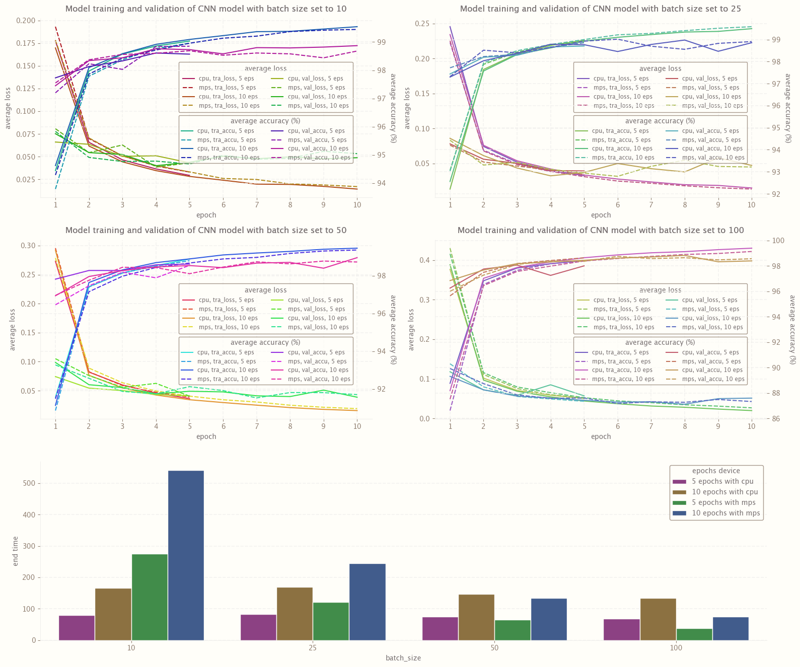

In [58]:
def type_checker_sns(typeid):
    global all_evaluation_types

    if typeid not in range(len(all_evaluation_types)):
        exception = Exception(
            "The index was not found in the list of supported evaluation types."
        )
        raise exception


def twin_legend(ax, title, bbox_to_anchor, borderpad=0.4):
    legend = ax.legend(
        title=title,
        ncol=2,
        bbox_to_anchor=bbox_to_anchor,
        fontsize="small",
        borderpad=borderpad,
    )
    legend.get_title().set_fontsize("10")
    return


def twin_switch_end(ax, title):
    bbox_to_anchor = (0.95, 0.475)
    twin_legend(ax, title, bbox_to_anchor)
    x_ticks = list(range(epochs[-1]))
    ax.set(
        xticks=x_ticks,
        xticklabels=[x + 1 for x in x_ticks],
    )
    ax.set_xlabel(xlabel=x, labelpad=5, rotation=0, ha="center")
    ax.set_ylabel(
        ylabel=title,
        labelpad=15,
        rotation=-90,
        ha="center",
    )


def twin_switcher_sns(ax, typeid, twin_switch, x="epoch"):
    global all_evaluation_types

    title = f"average {' '.join(all_evaluation_types[typeid].split()[1:])}"
    if twin_switch == "ON":
        bbox_to_anchor = (0.95, 0.775)
        borderpad = 0.67
        twin_legend(ax, title, bbox_to_anchor, borderpad)
        ax.set_ylabel(
            ylabel=title,
            labelpad=5,
            rotation=90,
            ha="center",
        )
        title = ax.get_title()
        ax = ax.axes.twinx()
        ax.set_title(title, loc="center", pad=10)
    elif twin_switch == "END":
        twin_switch_end(ax, title)
    return ax


def loss_accuracy_sns(
    df,
    bs,
    epoch,
    ax,
    title=None,
    x="epoch",
    typeid=0,
    twin_switch="OFF",
):
    global colors, batch_size, all_evaluation_types

    type_checker_sns(typeid)

    ax = sns.lineplot(
        data=df.loc[(df["batch size"] == batch_size[bs]) & (df["epochs"] == epoch)],
        x=x,
        y=all_evaluation_types[typeid],
        hue=f"{all_evaluation_types[typeid]} legend",
        palette=colors,
        ax=ax,
        style=f"{all_evaluation_types[typeid]} legend",
    )

    ax = twin_switcher_sns(ax, typeid, twin_switch, x)

    if ax.get_title() == "":
        if title is None:
            title = "Model training and validation of CNN model with batch size "
            title += f"set to {batch_size[bs]}"
        ax.set_title(title, loc="center", pad=10)
    return ax


plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2 * 3)

fig, axs = plt.subplots(nrows=3, ncols=2)

gridspec = axs[0, 0].get_gridspec()
for ax in axs[-1, :]:
    ax.remove()
axbig = fig.add_subplot(gridspec[-1, :])

for bs in range(len(batch_size)):
    colors = iter(calm_color_generator(15))
    for typeid in range(4):
        for epoch in epochs:
            if epoch == epochs[-1] and typeid == 1:
                twin_switch = "ON"
            elif epoch == epochs[-1] and typeid == 3:
                twin_switch = "END"
            else:
                twin_switch = "OFF"
            axs[bs // 2, bs % 2] = loss_accuracy_sns(
                df_1,
                bs=bs,
                epoch=epoch,
                ax=axs[bs // 2, bs % 2],
                typeid=typeid,
                twin_switch=twin_switch,
            )

dict_2 = {"batch_size": [], "epochs": [], "device": [], "end time": []}

for t, (b, e, d) in zip(end_time_list, itertools.product(batch_size, epochs, devices)):
    dict_2["batch_size"].append(b)
    dict_2["epochs"].append(e)
    dict_2["device"].append(d)
    dict_2["end time"].append(t)

df_2 = pd.DataFrame.from_dict(dict_2)

df_2["epochs device"] = df_2["epochs"].astype(str) + " epochs with " + df_2["device"]

df_2.sort_values("device", inplace=True)

sns.barplot(
    data=df_2,
    x="batch_size",
    y="end time",
    hue="epochs device",
    ax=axbig,
    palette=calm_color_generator(len(df_2["epochs device"].unique())),
)


fig.suptitle(
    "",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

# <a id='toc6_'></a>[Notebook Compression](#toc0_)


In [63]:
input_filename = "2 - CNN - Convolutional Neural Networks.ipynb"

#os.system(f"jupyter nbconvert --to notebook --inplace '{input_filename}'")
os.system(f"jupyter nbconvert --to html '{input_filename}'")

[NbConvertApp] Converting notebook 2 - CNN - Convolutional Neural Networks.ipynb to html
[NbConvertApp] Writing 4675826 bytes to 2 - CNN - Convolutional Neural Networks.html


0

In [64]:
output_filename = " (Compressed).".join(input_filename.split("."))

print(os.stat(input_filename).st_size)

# Keep the original file and create another compressed file to upload to GitHub by
# specifying the width of the output image
compress(
    input_filename, output_filename=output_filename, img_width=800, img_format="png"
)

print(os.stat(output_filename).st_size)

3755690
2911582
